In [23]:
from bmtk.builder.networks import NetworkBuilder


cortex = NetworkBuilder('cortex')
cortex.add_nodes(
    cell_name='626170421',
    potental='exc',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='fit_parameters.json',
    morphology='reconstruction.swc'
)


In [24]:
cortex.build()
cortex.save_nodes(output_dir='my_sim02/network')

In [25]:
thalamus = NetworkBuilder('mthalamus')
thalamus.add_nodes(
    N=10,
    pop_name='tON',
    potential='exc',
    model_type='virtual'
)

In [26]:
thalamus.add_edges(
    source={'pop_name': 'tON'}, target=cortex.nodes(),
    connection_rule=5,
    syn_weight=0.001,
    delay=2.0,
    weight_function=None,
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 150.0],
    dynamics_params='AMPA_ExcToExc.json',
    model_template='exp2syn'
)

In [27]:
thalamus.build()
thalamus.save_nodes(output_dir='my_sim02/network')
thalamus.save_edges(output_dir='my_sim02/network')

In [28]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

psg = PoissonSpikeGenerator(population='mthalamus')
psg.add(
    node_ids=range(10),  # Have 10 nodes to match mthalamus
    firing_rate=10.0,    # 10 Hz, we can also pass in a nonhomoegenous function/array
    times=(0.0, 3.0)    # Firing starts at 0 s up to 3 s
)
psg.to_sonata('my_sim02/inputs/neuropixel_electrode_1um.csv')

In [29]:
print('Number of spikes: {}'.format(psg.n_spikes()))
print('Units: {}'.format(psg.units()))

psg.to_dataframe().head()

Number of spikes: 296
Units: ms


,node_ids,timestamps,population
0,0,68.091031,mthalamus
1,0,142.699777,mthalamus
2,0,214.252751,mthalamus
3,0,288.587234,mthalamus
4,0,520.291410,mthalamus


In [30]:
from bmtk.utils.sim_setup import build_env_bionet

build_env_bionet(
    base_dir='my_sim02',
    config_file='config.json',
    network_dir='my_sim02/network',
    tstop=3000.0, dt=0.1,
    report_vars=['v', 'cai'],    # Record membrane potential and calcium (default soma)
    spikes_inputs=[('mthalamus', # Name of population which spikes will be generated for
                    'my_sim02/inputs/mthalamus_spikes.h5')],
    include_examples=True,       # Copies components files
    compile_mechanisms=True      # Will try to compile NEURON mechanisms
)

/opt/miniconda3/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/usr/bin/xcrun
/Users/ninazhang/Desktop/NZ/my_sim02/components/mechanisms
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/vecevent.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created x86_64/special


In [31]:
from bmtk.simulator import bionet
from neuron import h

# Initialize ParallelContext
pc = h.ParallelContext()

# Clear any existing gid assignments
if pc.gid_exists(0):  # Check if gid 0 already exists
    pc.gid_clear(0)   # Clear gid 0 if it is assigned

conf = bionet.Config.from_json('my_sim02/config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

# Reset the ParallelContext after the simulation (for subsequent runs)
pc.done()

2024-10-08 14:33:36,109 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


Mechanisms already loaded from path: /Users/ninazhang/Desktop/NZ/my_sim02/components/mechanisms.  Aborting.
2024-10-08 14:33:36,153 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2024-10-08 14:33:36,351 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2024-10-08 14:33:36,357 [INFO] Building virtual cell stimulations for mthalamus_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for mthalamus_spikes


2024-10-08 14:33:36,381 [INFO] Running simulation for 3000.000 ms with the time step 0.001 ms


INFO:NEURONIOUtils:Running simulation for 3000.000 ms with the time step 0.001 ms


2024-10-08 14:33:36,382 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2024-10-08 14:33:36,382 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2024-10-08 14:33:36,568 [INFO]     step:5000 t_sim:5.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:5.00 ms


2024-10-08 14:33:36,716 [INFO]     step:10000 t_sim:10.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:10.00 ms


2024-10-08 14:33:36,866 [INFO]     step:15000 t_sim:15.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:15.00 ms


2024-10-08 14:33:37,043 [INFO]     step:20000 t_sim:20.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:20.00 ms


2024-10-08 14:33:37,185 [INFO]     step:25000 t_sim:25.00 ms


INFO:NEURONIOUtils:    step:25000 t_sim:25.00 ms


2024-10-08 14:33:37,340 [INFO]     step:30000 t_sim:30.00 ms


INFO:NEURONIOUtils:    step:30000 t_sim:30.00 ms


2024-10-08 14:33:37,513 [INFO]     step:35000 t_sim:35.00 ms


INFO:NEURONIOUtils:    step:35000 t_sim:35.00 ms


2024-10-08 14:33:37,653 [INFO]     step:40000 t_sim:40.00 ms


INFO:NEURONIOUtils:    step:40000 t_sim:40.00 ms


2024-10-08 14:33:37,790 [INFO]     step:45000 t_sim:45.00 ms


INFO:NEURONIOUtils:    step:45000 t_sim:45.00 ms


2024-10-08 14:33:37,924 [INFO]     step:50000 t_sim:50.00 ms


INFO:NEURONIOUtils:    step:50000 t_sim:50.00 ms


2024-10-08 14:33:38,061 [INFO]     step:55000 t_sim:55.00 ms


INFO:NEURONIOUtils:    step:55000 t_sim:55.00 ms


2024-10-08 14:33:38,191 [INFO]     step:60000 t_sim:60.00 ms


INFO:NEURONIOUtils:    step:60000 t_sim:60.00 ms


2024-10-08 14:33:38,352 [INFO]     step:65000 t_sim:65.00 ms


INFO:NEURONIOUtils:    step:65000 t_sim:65.00 ms


2024-10-08 14:33:38,504 [INFO]     step:70000 t_sim:70.00 ms


INFO:NEURONIOUtils:    step:70000 t_sim:70.00 ms


2024-10-08 14:33:38,644 [INFO]     step:75000 t_sim:75.00 ms


INFO:NEURONIOUtils:    step:75000 t_sim:75.00 ms


2024-10-08 14:33:38,776 [INFO]     step:80000 t_sim:80.00 ms


INFO:NEURONIOUtils:    step:80000 t_sim:80.00 ms


2024-10-08 14:33:38,921 [INFO]     step:85000 t_sim:85.00 ms


INFO:NEURONIOUtils:    step:85000 t_sim:85.00 ms


2024-10-08 14:33:39,060 [INFO]     step:90000 t_sim:90.00 ms


INFO:NEURONIOUtils:    step:90000 t_sim:90.00 ms


2024-10-08 14:33:39,198 [INFO]     step:95000 t_sim:95.00 ms


INFO:NEURONIOUtils:    step:95000 t_sim:95.00 ms


2024-10-08 14:33:39,330 [INFO]     step:100000 t_sim:100.00 ms


INFO:NEURONIOUtils:    step:100000 t_sim:100.00 ms


2024-10-08 14:33:39,485 [INFO]     step:105000 t_sim:105.00 ms


INFO:NEURONIOUtils:    step:105000 t_sim:105.00 ms


2024-10-08 14:33:39,652 [INFO]     step:110000 t_sim:110.00 ms


INFO:NEURONIOUtils:    step:110000 t_sim:110.00 ms


2024-10-08 14:33:39,789 [INFO]     step:115000 t_sim:115.00 ms


INFO:NEURONIOUtils:    step:115000 t_sim:115.00 ms


2024-10-08 14:33:39,959 [INFO]     step:120000 t_sim:120.00 ms


INFO:NEURONIOUtils:    step:120000 t_sim:120.00 ms


2024-10-08 14:33:40,101 [INFO]     step:125000 t_sim:125.00 ms


INFO:NEURONIOUtils:    step:125000 t_sim:125.00 ms


2024-10-08 14:33:40,236 [INFO]     step:130000 t_sim:130.00 ms


INFO:NEURONIOUtils:    step:130000 t_sim:130.00 ms


2024-10-08 14:33:40,386 [INFO]     step:135000 t_sim:135.00 ms


INFO:NEURONIOUtils:    step:135000 t_sim:135.00 ms


2024-10-08 14:33:40,530 [INFO]     step:140000 t_sim:140.00 ms


INFO:NEURONIOUtils:    step:140000 t_sim:140.00 ms


2024-10-08 14:33:40,664 [INFO]     step:145000 t_sim:145.00 ms


INFO:NEURONIOUtils:    step:145000 t_sim:145.00 ms


2024-10-08 14:33:40,797 [INFO]     step:150000 t_sim:150.00 ms


INFO:NEURONIOUtils:    step:150000 t_sim:150.00 ms


2024-10-08 14:33:40,978 [INFO]     step:155000 t_sim:155.00 ms


INFO:NEURONIOUtils:    step:155000 t_sim:155.00 ms


2024-10-08 14:33:41,108 [INFO]     step:160000 t_sim:160.00 ms


INFO:NEURONIOUtils:    step:160000 t_sim:160.00 ms


2024-10-08 14:33:41,252 [INFO]     step:165000 t_sim:165.00 ms


INFO:NEURONIOUtils:    step:165000 t_sim:165.00 ms


2024-10-08 14:33:41,392 [INFO]     step:170000 t_sim:170.00 ms


INFO:NEURONIOUtils:    step:170000 t_sim:170.00 ms


2024-10-08 14:33:41,525 [INFO]     step:175000 t_sim:175.00 ms


INFO:NEURONIOUtils:    step:175000 t_sim:175.00 ms


2024-10-08 14:33:41,659 [INFO]     step:180000 t_sim:180.00 ms


INFO:NEURONIOUtils:    step:180000 t_sim:180.00 ms


2024-10-08 14:33:41,793 [INFO]     step:185000 t_sim:185.00 ms


INFO:NEURONIOUtils:    step:185000 t_sim:185.00 ms


2024-10-08 14:33:41,923 [INFO]     step:190000 t_sim:190.00 ms


INFO:NEURONIOUtils:    step:190000 t_sim:190.00 ms


2024-10-08 14:33:42,075 [INFO]     step:195000 t_sim:195.00 ms


INFO:NEURONIOUtils:    step:195000 t_sim:195.00 ms


2024-10-08 14:33:42,237 [INFO]     step:200000 t_sim:200.00 ms


INFO:NEURONIOUtils:    step:200000 t_sim:200.00 ms


2024-10-08 14:33:42,367 [INFO]     step:205000 t_sim:205.00 ms


INFO:NEURONIOUtils:    step:205000 t_sim:205.00 ms


2024-10-08 14:33:42,507 [INFO]     step:210000 t_sim:210.00 ms


INFO:NEURONIOUtils:    step:210000 t_sim:210.00 ms


2024-10-08 14:33:42,644 [INFO]     step:215000 t_sim:215.00 ms


INFO:NEURONIOUtils:    step:215000 t_sim:215.00 ms


2024-10-08 14:33:42,785 [INFO]     step:220000 t_sim:220.00 ms


INFO:NEURONIOUtils:    step:220000 t_sim:220.00 ms


2024-10-08 14:33:42,932 [INFO]     step:225000 t_sim:225.00 ms


INFO:NEURONIOUtils:    step:225000 t_sim:225.00 ms


2024-10-08 14:33:43,071 [INFO]     step:230000 t_sim:230.00 ms


INFO:NEURONIOUtils:    step:230000 t_sim:230.00 ms


2024-10-08 14:33:43,200 [INFO]     step:235000 t_sim:235.00 ms


INFO:NEURONIOUtils:    step:235000 t_sim:235.00 ms


2024-10-08 14:33:43,333 [INFO]     step:240000 t_sim:240.00 ms


INFO:NEURONIOUtils:    step:240000 t_sim:240.00 ms


2024-10-08 14:33:43,469 [INFO]     step:245000 t_sim:245.00 ms


INFO:NEURONIOUtils:    step:245000 t_sim:245.00 ms


2024-10-08 14:33:43,606 [INFO]     step:250000 t_sim:250.00 ms


INFO:NEURONIOUtils:    step:250000 t_sim:250.00 ms


2024-10-08 14:33:43,754 [INFO]     step:255000 t_sim:255.00 ms


INFO:NEURONIOUtils:    step:255000 t_sim:255.00 ms


2024-10-08 14:33:43,887 [INFO]     step:260000 t_sim:260.00 ms


INFO:NEURONIOUtils:    step:260000 t_sim:260.00 ms


2024-10-08 14:33:44,018 [INFO]     step:265000 t_sim:265.00 ms


INFO:NEURONIOUtils:    step:265000 t_sim:265.00 ms


2024-10-08 14:33:44,160 [INFO]     step:270000 t_sim:270.00 ms


INFO:NEURONIOUtils:    step:270000 t_sim:270.00 ms


2024-10-08 14:33:44,294 [INFO]     step:275000 t_sim:275.00 ms


INFO:NEURONIOUtils:    step:275000 t_sim:275.00 ms


2024-10-08 14:33:44,462 [INFO]     step:280000 t_sim:280.00 ms


INFO:NEURONIOUtils:    step:280000 t_sim:280.00 ms


2024-10-08 14:33:44,623 [INFO]     step:285000 t_sim:285.00 ms


INFO:NEURONIOUtils:    step:285000 t_sim:285.00 ms


2024-10-08 14:33:44,760 [INFO]     step:290000 t_sim:290.00 ms


INFO:NEURONIOUtils:    step:290000 t_sim:290.00 ms


2024-10-08 14:33:44,895 [INFO]     step:295000 t_sim:295.00 ms


INFO:NEURONIOUtils:    step:295000 t_sim:295.00 ms


2024-10-08 14:33:45,039 [INFO]     step:300000 t_sim:300.00 ms


INFO:NEURONIOUtils:    step:300000 t_sim:300.00 ms


2024-10-08 14:33:45,180 [INFO]     step:305000 t_sim:305.00 ms


INFO:NEURONIOUtils:    step:305000 t_sim:305.00 ms


2024-10-08 14:33:45,310 [INFO]     step:310000 t_sim:310.00 ms


INFO:NEURONIOUtils:    step:310000 t_sim:310.00 ms


2024-10-08 14:33:45,447 [INFO]     step:315000 t_sim:315.00 ms


INFO:NEURONIOUtils:    step:315000 t_sim:315.00 ms


2024-10-08 14:33:45,593 [INFO]     step:320000 t_sim:320.00 ms


INFO:NEURONIOUtils:    step:320000 t_sim:320.00 ms


2024-10-08 14:33:45,738 [INFO]     step:325000 t_sim:325.00 ms


INFO:NEURONIOUtils:    step:325000 t_sim:325.00 ms


2024-10-08 14:33:45,883 [INFO]     step:330000 t_sim:330.00 ms


INFO:NEURONIOUtils:    step:330000 t_sim:330.00 ms


2024-10-08 14:33:46,013 [INFO]     step:335000 t_sim:335.00 ms


INFO:NEURONIOUtils:    step:335000 t_sim:335.00 ms


2024-10-08 14:33:46,149 [INFO]     step:340000 t_sim:340.00 ms


INFO:NEURONIOUtils:    step:340000 t_sim:340.00 ms


2024-10-08 14:33:46,286 [INFO]     step:345000 t_sim:345.00 ms


INFO:NEURONIOUtils:    step:345000 t_sim:345.00 ms


2024-10-08 14:33:46,436 [INFO]     step:350000 t_sim:350.00 ms


INFO:NEURONIOUtils:    step:350000 t_sim:350.00 ms


2024-10-08 14:33:46,575 [INFO]     step:355000 t_sim:355.00 ms


INFO:NEURONIOUtils:    step:355000 t_sim:355.00 ms


2024-10-08 14:33:46,748 [INFO]     step:360000 t_sim:360.00 ms


INFO:NEURONIOUtils:    step:360000 t_sim:360.00 ms


2024-10-08 14:33:46,884 [INFO]     step:365000 t_sim:365.00 ms


INFO:NEURONIOUtils:    step:365000 t_sim:365.00 ms


2024-10-08 14:33:47,017 [INFO]     step:370000 t_sim:370.00 ms


INFO:NEURONIOUtils:    step:370000 t_sim:370.00 ms


2024-10-08 14:33:47,153 [INFO]     step:375000 t_sim:375.00 ms


INFO:NEURONIOUtils:    step:375000 t_sim:375.00 ms


2024-10-08 14:33:47,287 [INFO]     step:380000 t_sim:380.00 ms


INFO:NEURONIOUtils:    step:380000 t_sim:380.00 ms


2024-10-08 14:33:47,421 [INFO]     step:385000 t_sim:385.00 ms


INFO:NEURONIOUtils:    step:385000 t_sim:385.00 ms


2024-10-08 14:33:47,564 [INFO]     step:390000 t_sim:390.00 ms


INFO:NEURONIOUtils:    step:390000 t_sim:390.00 ms


2024-10-08 14:33:47,708 [INFO]     step:395000 t_sim:395.00 ms


INFO:NEURONIOUtils:    step:395000 t_sim:395.00 ms


2024-10-08 14:33:47,849 [INFO]     step:400000 t_sim:400.00 ms


INFO:NEURONIOUtils:    step:400000 t_sim:400.00 ms


2024-10-08 14:33:47,989 [INFO]     step:405000 t_sim:405.00 ms


INFO:NEURONIOUtils:    step:405000 t_sim:405.00 ms


2024-10-08 14:33:48,142 [INFO]     step:410000 t_sim:410.00 ms


INFO:NEURONIOUtils:    step:410000 t_sim:410.00 ms


2024-10-08 14:33:48,280 [INFO]     step:415000 t_sim:415.00 ms


INFO:NEURONIOUtils:    step:415000 t_sim:415.00 ms


2024-10-08 14:33:48,418 [INFO]     step:420000 t_sim:420.00 ms


INFO:NEURONIOUtils:    step:420000 t_sim:420.00 ms


2024-10-08 14:33:48,558 [INFO]     step:425000 t_sim:425.00 ms


INFO:NEURONIOUtils:    step:425000 t_sim:425.00 ms


2024-10-08 14:33:48,698 [INFO]     step:430000 t_sim:430.00 ms


INFO:NEURONIOUtils:    step:430000 t_sim:430.00 ms


2024-10-08 14:33:48,842 [INFO]     step:435000 t_sim:435.00 ms


INFO:NEURONIOUtils:    step:435000 t_sim:435.00 ms


2024-10-08 14:33:48,985 [INFO]     step:440000 t_sim:440.00 ms


INFO:NEURONIOUtils:    step:440000 t_sim:440.00 ms


2024-10-08 14:33:49,150 [INFO]     step:445000 t_sim:445.00 ms


INFO:NEURONIOUtils:    step:445000 t_sim:445.00 ms


2024-10-08 14:33:49,299 [INFO]     step:450000 t_sim:450.00 ms


INFO:NEURONIOUtils:    step:450000 t_sim:450.00 ms


2024-10-08 14:33:49,452 [INFO]     step:455000 t_sim:455.00 ms


INFO:NEURONIOUtils:    step:455000 t_sim:455.00 ms


2024-10-08 14:33:49,593 [INFO]     step:460000 t_sim:460.00 ms


INFO:NEURONIOUtils:    step:460000 t_sim:460.00 ms


2024-10-08 14:33:49,740 [INFO]     step:465000 t_sim:465.00 ms


INFO:NEURONIOUtils:    step:465000 t_sim:465.00 ms


2024-10-08 14:33:49,876 [INFO]     step:470000 t_sim:470.00 ms


INFO:NEURONIOUtils:    step:470000 t_sim:470.00 ms


2024-10-08 14:33:50,031 [INFO]     step:475000 t_sim:475.00 ms


INFO:NEURONIOUtils:    step:475000 t_sim:475.00 ms


2024-10-08 14:33:50,175 [INFO]     step:480000 t_sim:480.00 ms


INFO:NEURONIOUtils:    step:480000 t_sim:480.00 ms


2024-10-08 14:33:50,326 [INFO]     step:485000 t_sim:485.00 ms


INFO:NEURONIOUtils:    step:485000 t_sim:485.00 ms


2024-10-08 14:33:50,466 [INFO]     step:490000 t_sim:490.00 ms


INFO:NEURONIOUtils:    step:490000 t_sim:490.00 ms


2024-10-08 14:33:50,614 [INFO]     step:495000 t_sim:495.00 ms


INFO:NEURONIOUtils:    step:495000 t_sim:495.00 ms


2024-10-08 14:33:50,759 [INFO]     step:500000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:500000 t_sim:500.00 ms


2024-10-08 14:33:50,897 [INFO]     step:505000 t_sim:505.00 ms


INFO:NEURONIOUtils:    step:505000 t_sim:505.00 ms


2024-10-08 14:33:51,031 [INFO]     step:510000 t_sim:510.00 ms


INFO:NEURONIOUtils:    step:510000 t_sim:510.00 ms


2024-10-08 14:33:51,182 [INFO]     step:515000 t_sim:515.00 ms


INFO:NEURONIOUtils:    step:515000 t_sim:515.00 ms


2024-10-08 14:33:51,327 [INFO]     step:520000 t_sim:520.00 ms


INFO:NEURONIOUtils:    step:520000 t_sim:520.00 ms


2024-10-08 14:33:51,476 [INFO]     step:525000 t_sim:525.00 ms


INFO:NEURONIOUtils:    step:525000 t_sim:525.00 ms


2024-10-08 14:33:51,710 [INFO]     step:530000 t_sim:530.00 ms


INFO:NEURONIOUtils:    step:530000 t_sim:530.00 ms


2024-10-08 14:33:51,842 [INFO]     step:535000 t_sim:535.00 ms


INFO:NEURONIOUtils:    step:535000 t_sim:535.00 ms


2024-10-08 14:33:51,994 [INFO]     step:540000 t_sim:540.00 ms


INFO:NEURONIOUtils:    step:540000 t_sim:540.00 ms


2024-10-08 14:33:52,136 [INFO]     step:545000 t_sim:545.00 ms


INFO:NEURONIOUtils:    step:545000 t_sim:545.00 ms


2024-10-08 14:33:52,272 [INFO]     step:550000 t_sim:550.00 ms


INFO:NEURONIOUtils:    step:550000 t_sim:550.00 ms


2024-10-08 14:33:52,412 [INFO]     step:555000 t_sim:555.00 ms


INFO:NEURONIOUtils:    step:555000 t_sim:555.00 ms


2024-10-08 14:33:52,563 [INFO]     step:560000 t_sim:560.00 ms


INFO:NEURONIOUtils:    step:560000 t_sim:560.00 ms


2024-10-08 14:33:52,697 [INFO]     step:565000 t_sim:565.00 ms


INFO:NEURONIOUtils:    step:565000 t_sim:565.00 ms


2024-10-08 14:33:52,843 [INFO]     step:570000 t_sim:570.00 ms


INFO:NEURONIOUtils:    step:570000 t_sim:570.00 ms


2024-10-08 14:33:52,985 [INFO]     step:575000 t_sim:575.00 ms


INFO:NEURONIOUtils:    step:575000 t_sim:575.00 ms


2024-10-08 14:33:53,121 [INFO]     step:580000 t_sim:580.00 ms


INFO:NEURONIOUtils:    step:580000 t_sim:580.00 ms


2024-10-08 14:33:53,286 [INFO]     step:585000 t_sim:585.00 ms


INFO:NEURONIOUtils:    step:585000 t_sim:585.00 ms


2024-10-08 14:33:53,429 [INFO]     step:590000 t_sim:590.00 ms


INFO:NEURONIOUtils:    step:590000 t_sim:590.00 ms


2024-10-08 14:33:53,565 [INFO]     step:595000 t_sim:595.00 ms


INFO:NEURONIOUtils:    step:595000 t_sim:595.00 ms


2024-10-08 14:33:53,722 [INFO]     step:600000 t_sim:600.00 ms


INFO:NEURONIOUtils:    step:600000 t_sim:600.00 ms


2024-10-08 14:33:53,856 [INFO]     step:605000 t_sim:605.00 ms


INFO:NEURONIOUtils:    step:605000 t_sim:605.00 ms


2024-10-08 14:33:54,035 [INFO]     step:610000 t_sim:610.00 ms


INFO:NEURONIOUtils:    step:610000 t_sim:610.00 ms


2024-10-08 14:33:54,179 [INFO]     step:615000 t_sim:615.00 ms


INFO:NEURONIOUtils:    step:615000 t_sim:615.00 ms


2024-10-08 14:33:54,311 [INFO]     step:620000 t_sim:620.00 ms


INFO:NEURONIOUtils:    step:620000 t_sim:620.00 ms


2024-10-08 14:33:54,450 [INFO]     step:625000 t_sim:625.00 ms


INFO:NEURONIOUtils:    step:625000 t_sim:625.00 ms


2024-10-08 14:33:54,591 [INFO]     step:630000 t_sim:630.00 ms


INFO:NEURONIOUtils:    step:630000 t_sim:630.00 ms


2024-10-08 14:33:54,752 [INFO]     step:635000 t_sim:635.00 ms


INFO:NEURONIOUtils:    step:635000 t_sim:635.00 ms


2024-10-08 14:33:54,884 [INFO]     step:640000 t_sim:640.00 ms


INFO:NEURONIOUtils:    step:640000 t_sim:640.00 ms


2024-10-08 14:33:55,038 [INFO]     step:645000 t_sim:645.00 ms


INFO:NEURONIOUtils:    step:645000 t_sim:645.00 ms


2024-10-08 14:33:55,209 [INFO]     step:650000 t_sim:650.00 ms


INFO:NEURONIOUtils:    step:650000 t_sim:650.00 ms


2024-10-08 14:33:55,352 [INFO]     step:655000 t_sim:655.00 ms


INFO:NEURONIOUtils:    step:655000 t_sim:655.00 ms


2024-10-08 14:33:55,484 [INFO]     step:660000 t_sim:660.00 ms


INFO:NEURONIOUtils:    step:660000 t_sim:660.00 ms


2024-10-08 14:33:55,619 [INFO]     step:665000 t_sim:665.00 ms


INFO:NEURONIOUtils:    step:665000 t_sim:665.00 ms


2024-10-08 14:33:55,767 [INFO]     step:670000 t_sim:670.00 ms


INFO:NEURONIOUtils:    step:670000 t_sim:670.00 ms


2024-10-08 14:33:55,902 [INFO]     step:675000 t_sim:675.00 ms


INFO:NEURONIOUtils:    step:675000 t_sim:675.00 ms


2024-10-08 14:33:56,041 [INFO]     step:680000 t_sim:680.00 ms


INFO:NEURONIOUtils:    step:680000 t_sim:680.00 ms


2024-10-08 14:33:56,182 [INFO]     step:685000 t_sim:685.00 ms


INFO:NEURONIOUtils:    step:685000 t_sim:685.00 ms


2024-10-08 14:33:56,388 [INFO]     step:690000 t_sim:690.00 ms


INFO:NEURONIOUtils:    step:690000 t_sim:690.00 ms


2024-10-08 14:33:56,520 [INFO]     step:695000 t_sim:695.00 ms


INFO:NEURONIOUtils:    step:695000 t_sim:695.00 ms


2024-10-08 14:33:56,694 [INFO]     step:700000 t_sim:700.00 ms


INFO:NEURONIOUtils:    step:700000 t_sim:700.00 ms


2024-10-08 14:33:56,837 [INFO]     step:705000 t_sim:705.00 ms


INFO:NEURONIOUtils:    step:705000 t_sim:705.00 ms


2024-10-08 14:33:56,995 [INFO]     step:710000 t_sim:710.00 ms


INFO:NEURONIOUtils:    step:710000 t_sim:710.00 ms


2024-10-08 14:33:57,136 [INFO]     step:715000 t_sim:715.00 ms


INFO:NEURONIOUtils:    step:715000 t_sim:715.00 ms


2024-10-08 14:33:57,305 [INFO]     step:720000 t_sim:720.00 ms


INFO:NEURONIOUtils:    step:720000 t_sim:720.00 ms


2024-10-08 14:33:57,463 [INFO]     step:725000 t_sim:725.00 ms


INFO:NEURONIOUtils:    step:725000 t_sim:725.00 ms


2024-10-08 14:33:57,602 [INFO]     step:730000 t_sim:730.00 ms


INFO:NEURONIOUtils:    step:730000 t_sim:730.00 ms


2024-10-08 14:33:57,764 [INFO]     step:735000 t_sim:735.00 ms


INFO:NEURONIOUtils:    step:735000 t_sim:735.00 ms


2024-10-08 14:33:57,899 [INFO]     step:740000 t_sim:740.00 ms


INFO:NEURONIOUtils:    step:740000 t_sim:740.00 ms


2024-10-08 14:33:58,048 [INFO]     step:745000 t_sim:745.00 ms


INFO:NEURONIOUtils:    step:745000 t_sim:745.00 ms


2024-10-08 14:33:58,210 [INFO]     step:750000 t_sim:750.00 ms


INFO:NEURONIOUtils:    step:750000 t_sim:750.00 ms


2024-10-08 14:33:58,355 [INFO]     step:755000 t_sim:755.00 ms


INFO:NEURONIOUtils:    step:755000 t_sim:755.00 ms


2024-10-08 14:33:58,496 [INFO]     step:760000 t_sim:760.00 ms


INFO:NEURONIOUtils:    step:760000 t_sim:760.00 ms


2024-10-08 14:33:58,632 [INFO]     step:765000 t_sim:765.00 ms


INFO:NEURONIOUtils:    step:765000 t_sim:765.00 ms


2024-10-08 14:33:58,804 [INFO]     step:770000 t_sim:770.00 ms


INFO:NEURONIOUtils:    step:770000 t_sim:770.00 ms


2024-10-08 14:33:58,938 [INFO]     step:775000 t_sim:775.00 ms


INFO:NEURONIOUtils:    step:775000 t_sim:775.00 ms


2024-10-08 14:33:59,081 [INFO]     step:780000 t_sim:780.00 ms


INFO:NEURONIOUtils:    step:780000 t_sim:780.00 ms


2024-10-08 14:33:59,222 [INFO]     step:785000 t_sim:785.00 ms


INFO:NEURONIOUtils:    step:785000 t_sim:785.00 ms


2024-10-08 14:33:59,406 [INFO]     step:790000 t_sim:790.00 ms


INFO:NEURONIOUtils:    step:790000 t_sim:790.00 ms


2024-10-08 14:33:59,545 [INFO]     step:795000 t_sim:795.00 ms


INFO:NEURONIOUtils:    step:795000 t_sim:795.00 ms


2024-10-08 14:33:59,680 [INFO]     step:800000 t_sim:800.00 ms


INFO:NEURONIOUtils:    step:800000 t_sim:800.00 ms


2024-10-08 14:33:59,824 [INFO]     step:805000 t_sim:805.00 ms


INFO:NEURONIOUtils:    step:805000 t_sim:805.00 ms


2024-10-08 14:33:59,964 [INFO]     step:810000 t_sim:810.00 ms


INFO:NEURONIOUtils:    step:810000 t_sim:810.00 ms


2024-10-08 14:34:00,125 [INFO]     step:815000 t_sim:815.00 ms


INFO:NEURONIOUtils:    step:815000 t_sim:815.00 ms


2024-10-08 14:34:00,257 [INFO]     step:820000 t_sim:820.00 ms


INFO:NEURONIOUtils:    step:820000 t_sim:820.00 ms


2024-10-08 14:34:00,413 [INFO]     step:825000 t_sim:825.00 ms


INFO:NEURONIOUtils:    step:825000 t_sim:825.00 ms


2024-10-08 14:34:00,553 [INFO]     step:830000 t_sim:830.00 ms


INFO:NEURONIOUtils:    step:830000 t_sim:830.00 ms


2024-10-08 14:34:00,721 [INFO]     step:835000 t_sim:835.00 ms


INFO:NEURONIOUtils:    step:835000 t_sim:835.00 ms


2024-10-08 14:34:00,858 [INFO]     step:840000 t_sim:840.00 ms


INFO:NEURONIOUtils:    step:840000 t_sim:840.00 ms


2024-10-08 14:34:01,024 [INFO]     step:845000 t_sim:845.00 ms


INFO:NEURONIOUtils:    step:845000 t_sim:845.00 ms


2024-10-08 14:34:01,175 [INFO]     step:850000 t_sim:850.00 ms


INFO:NEURONIOUtils:    step:850000 t_sim:850.00 ms


2024-10-08 14:34:01,311 [INFO]     step:855000 t_sim:855.00 ms


INFO:NEURONIOUtils:    step:855000 t_sim:855.00 ms


2024-10-08 14:34:01,467 [INFO]     step:860000 t_sim:860.00 ms


INFO:NEURONIOUtils:    step:860000 t_sim:860.00 ms


2024-10-08 14:34:01,612 [INFO]     step:865000 t_sim:865.00 ms


INFO:NEURONIOUtils:    step:865000 t_sim:865.00 ms


2024-10-08 14:34:01,746 [INFO]     step:870000 t_sim:870.00 ms


INFO:NEURONIOUtils:    step:870000 t_sim:870.00 ms


2024-10-08 14:34:01,884 [INFO]     step:875000 t_sim:875.00 ms


INFO:NEURONIOUtils:    step:875000 t_sim:875.00 ms


2024-10-08 14:34:02,061 [INFO]     step:880000 t_sim:880.00 ms


INFO:NEURONIOUtils:    step:880000 t_sim:880.00 ms


2024-10-08 14:34:02,194 [INFO]     step:885000 t_sim:885.00 ms


INFO:NEURONIOUtils:    step:885000 t_sim:885.00 ms


2024-10-08 14:34:02,338 [INFO]     step:890000 t_sim:890.00 ms


INFO:NEURONIOUtils:    step:890000 t_sim:890.00 ms


2024-10-08 14:34:02,474 [INFO]     step:895000 t_sim:895.00 ms


INFO:NEURONIOUtils:    step:895000 t_sim:895.00 ms


2024-10-08 14:34:02,612 [INFO]     step:900000 t_sim:900.00 ms


INFO:NEURONIOUtils:    step:900000 t_sim:900.00 ms


2024-10-08 14:34:02,755 [INFO]     step:905000 t_sim:905.00 ms


INFO:NEURONIOUtils:    step:905000 t_sim:905.00 ms


2024-10-08 14:34:02,891 [INFO]     step:910000 t_sim:910.00 ms


INFO:NEURONIOUtils:    step:910000 t_sim:910.00 ms


2024-10-08 14:34:03,051 [INFO]     step:915000 t_sim:915.00 ms


INFO:NEURONIOUtils:    step:915000 t_sim:915.00 ms


2024-10-08 14:34:03,195 [INFO]     step:920000 t_sim:920.00 ms


INFO:NEURONIOUtils:    step:920000 t_sim:920.00 ms


2024-10-08 14:34:03,368 [INFO]     step:925000 t_sim:925.00 ms


INFO:NEURONIOUtils:    step:925000 t_sim:925.00 ms


2024-10-08 14:34:03,509 [INFO]     step:930000 t_sim:930.00 ms


INFO:NEURONIOUtils:    step:930000 t_sim:930.00 ms


2024-10-08 14:34:03,652 [INFO]     step:935000 t_sim:935.00 ms


INFO:NEURONIOUtils:    step:935000 t_sim:935.00 ms


2024-10-08 14:34:03,814 [INFO]     step:940000 t_sim:940.00 ms


INFO:NEURONIOUtils:    step:940000 t_sim:940.00 ms


2024-10-08 14:34:03,957 [INFO]     step:945000 t_sim:945.00 ms


INFO:NEURONIOUtils:    step:945000 t_sim:945.00 ms


2024-10-08 14:34:04,115 [INFO]     step:950000 t_sim:950.00 ms


INFO:NEURONIOUtils:    step:950000 t_sim:950.00 ms


2024-10-08 14:34:04,267 [INFO]     step:955000 t_sim:955.00 ms


INFO:NEURONIOUtils:    step:955000 t_sim:955.00 ms


2024-10-08 14:34:04,413 [INFO]     step:960000 t_sim:960.00 ms


INFO:NEURONIOUtils:    step:960000 t_sim:960.00 ms


2024-10-08 14:34:04,556 [INFO]     step:965000 t_sim:965.00 ms


INFO:NEURONIOUtils:    step:965000 t_sim:965.00 ms


2024-10-08 14:34:04,701 [INFO]     step:970000 t_sim:970.00 ms


INFO:NEURONIOUtils:    step:970000 t_sim:970.00 ms


2024-10-08 14:34:04,834 [INFO]     step:975000 t_sim:975.00 ms


INFO:NEURONIOUtils:    step:975000 t_sim:975.00 ms


2024-10-08 14:34:04,981 [INFO]     step:980000 t_sim:980.00 ms


INFO:NEURONIOUtils:    step:980000 t_sim:980.00 ms


2024-10-08 14:34:05,119 [INFO]     step:985000 t_sim:985.00 ms


INFO:NEURONIOUtils:    step:985000 t_sim:985.00 ms


2024-10-08 14:34:05,271 [INFO]     step:990000 t_sim:990.00 ms


INFO:NEURONIOUtils:    step:990000 t_sim:990.00 ms


2024-10-08 14:34:05,419 [INFO]     step:995000 t_sim:995.00 ms


INFO:NEURONIOUtils:    step:995000 t_sim:995.00 ms


2024-10-08 14:34:05,563 [INFO]     step:1000000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:1000000 t_sim:1000.00 ms


2024-10-08 14:34:05,747 [INFO]     step:1005000 t_sim:1005.00 ms


INFO:NEURONIOUtils:    step:1005000 t_sim:1005.00 ms


2024-10-08 14:34:05,883 [INFO]     step:1010000 t_sim:1010.00 ms


INFO:NEURONIOUtils:    step:1010000 t_sim:1010.00 ms


2024-10-08 14:34:06,028 [INFO]     step:1015000 t_sim:1015.00 ms


INFO:NEURONIOUtils:    step:1015000 t_sim:1015.00 ms


2024-10-08 14:34:06,194 [INFO]     step:1020000 t_sim:1020.00 ms


INFO:NEURONIOUtils:    step:1020000 t_sim:1020.00 ms


2024-10-08 14:34:06,353 [INFO]     step:1025000 t_sim:1025.00 ms


INFO:NEURONIOUtils:    step:1025000 t_sim:1025.00 ms


2024-10-08 14:34:06,487 [INFO]     step:1030000 t_sim:1030.00 ms


INFO:NEURONIOUtils:    step:1030000 t_sim:1030.00 ms


2024-10-08 14:34:06,624 [INFO]     step:1035000 t_sim:1035.00 ms


INFO:NEURONIOUtils:    step:1035000 t_sim:1035.00 ms


2024-10-08 14:34:06,772 [INFO]     step:1040000 t_sim:1040.00 ms


INFO:NEURONIOUtils:    step:1040000 t_sim:1040.00 ms


2024-10-08 14:34:06,909 [INFO]     step:1045000 t_sim:1045.00 ms


INFO:NEURONIOUtils:    step:1045000 t_sim:1045.00 ms


2024-10-08 14:34:07,043 [INFO]     step:1050000 t_sim:1050.00 ms


INFO:NEURONIOUtils:    step:1050000 t_sim:1050.00 ms


2024-10-08 14:34:07,191 [INFO]     step:1055000 t_sim:1055.00 ms


INFO:NEURONIOUtils:    step:1055000 t_sim:1055.00 ms


2024-10-08 14:34:07,334 [INFO]     step:1060000 t_sim:1060.00 ms


INFO:NEURONIOUtils:    step:1060000 t_sim:1060.00 ms


2024-10-08 14:34:07,492 [INFO]     step:1065000 t_sim:1065.00 ms


INFO:NEURONIOUtils:    step:1065000 t_sim:1065.00 ms


2024-10-08 14:34:07,639 [INFO]     step:1070000 t_sim:1070.00 ms


INFO:NEURONIOUtils:    step:1070000 t_sim:1070.00 ms


2024-10-08 14:34:07,784 [INFO]     step:1075000 t_sim:1075.00 ms


INFO:NEURONIOUtils:    step:1075000 t_sim:1075.00 ms


2024-10-08 14:34:07,952 [INFO]     step:1080000 t_sim:1080.00 ms


INFO:NEURONIOUtils:    step:1080000 t_sim:1080.00 ms


2024-10-08 14:34:08,104 [INFO]     step:1085000 t_sim:1085.00 ms


INFO:NEURONIOUtils:    step:1085000 t_sim:1085.00 ms


2024-10-08 14:34:08,255 [INFO]     step:1090000 t_sim:1090.00 ms


INFO:NEURONIOUtils:    step:1090000 t_sim:1090.00 ms


2024-10-08 14:34:08,407 [INFO]     step:1095000 t_sim:1095.00 ms


INFO:NEURONIOUtils:    step:1095000 t_sim:1095.00 ms


2024-10-08 14:34:08,552 [INFO]     step:1100000 t_sim:1100.00 ms


INFO:NEURONIOUtils:    step:1100000 t_sim:1100.00 ms


2024-10-08 14:34:08,687 [INFO]     step:1105000 t_sim:1105.00 ms


INFO:NEURONIOUtils:    step:1105000 t_sim:1105.00 ms


2024-10-08 14:34:08,827 [INFO]     step:1110000 t_sim:1110.00 ms


INFO:NEURONIOUtils:    step:1110000 t_sim:1110.00 ms


2024-10-08 14:34:08,969 [INFO]     step:1115000 t_sim:1115.00 ms


INFO:NEURONIOUtils:    step:1115000 t_sim:1115.00 ms


2024-10-08 14:34:09,114 [INFO]     step:1120000 t_sim:1120.00 ms


INFO:NEURONIOUtils:    step:1120000 t_sim:1120.00 ms


2024-10-08 14:34:09,263 [INFO]     step:1125000 t_sim:1125.00 ms


INFO:NEURONIOUtils:    step:1125000 t_sim:1125.00 ms


2024-10-08 14:34:09,403 [INFO]     step:1130000 t_sim:1130.00 ms


INFO:NEURONIOUtils:    step:1130000 t_sim:1130.00 ms


2024-10-08 14:34:09,552 [INFO]     step:1135000 t_sim:1135.00 ms


INFO:NEURONIOUtils:    step:1135000 t_sim:1135.00 ms


2024-10-08 14:34:09,700 [INFO]     step:1140000 t_sim:1140.00 ms


INFO:NEURONIOUtils:    step:1140000 t_sim:1140.00 ms


2024-10-08 14:34:09,838 [INFO]     step:1145000 t_sim:1145.00 ms


INFO:NEURONIOUtils:    step:1145000 t_sim:1145.00 ms


2024-10-08 14:34:09,973 [INFO]     step:1150000 t_sim:1150.00 ms


INFO:NEURONIOUtils:    step:1150000 t_sim:1150.00 ms


2024-10-08 14:34:10,154 [INFO]     step:1155000 t_sim:1155.00 ms


INFO:NEURONIOUtils:    step:1155000 t_sim:1155.00 ms


2024-10-08 14:34:10,293 [INFO]     step:1160000 t_sim:1160.00 ms


INFO:NEURONIOUtils:    step:1160000 t_sim:1160.00 ms


2024-10-08 14:34:10,448 [INFO]     step:1165000 t_sim:1165.00 ms


INFO:NEURONIOUtils:    step:1165000 t_sim:1165.00 ms


2024-10-08 14:34:10,611 [INFO]     step:1170000 t_sim:1170.00 ms


INFO:NEURONIOUtils:    step:1170000 t_sim:1170.00 ms


2024-10-08 14:34:10,768 [INFO]     step:1175000 t_sim:1175.00 ms


INFO:NEURONIOUtils:    step:1175000 t_sim:1175.00 ms


2024-10-08 14:34:10,932 [INFO]     step:1180000 t_sim:1180.00 ms


INFO:NEURONIOUtils:    step:1180000 t_sim:1180.00 ms


2024-10-08 14:34:11,071 [INFO]     step:1185000 t_sim:1185.00 ms


INFO:NEURONIOUtils:    step:1185000 t_sim:1185.00 ms


2024-10-08 14:34:11,215 [INFO]     step:1190000 t_sim:1190.00 ms


INFO:NEURONIOUtils:    step:1190000 t_sim:1190.00 ms


2024-10-08 14:34:11,362 [INFO]     step:1195000 t_sim:1195.00 ms


INFO:NEURONIOUtils:    step:1195000 t_sim:1195.00 ms


2024-10-08 14:34:11,500 [INFO]     step:1200000 t_sim:1200.00 ms


INFO:NEURONIOUtils:    step:1200000 t_sim:1200.00 ms


2024-10-08 14:34:11,639 [INFO]     step:1205000 t_sim:1205.00 ms


INFO:NEURONIOUtils:    step:1205000 t_sim:1205.00 ms


2024-10-08 14:34:11,795 [INFO]     step:1210000 t_sim:1210.00 ms


INFO:NEURONIOUtils:    step:1210000 t_sim:1210.00 ms


2024-10-08 14:34:11,939 [INFO]     step:1215000 t_sim:1215.00 ms


INFO:NEURONIOUtils:    step:1215000 t_sim:1215.00 ms


2024-10-08 14:34:12,077 [INFO]     step:1220000 t_sim:1220.00 ms


INFO:NEURONIOUtils:    step:1220000 t_sim:1220.00 ms


2024-10-08 14:34:12,216 [INFO]     step:1225000 t_sim:1225.00 ms


INFO:NEURONIOUtils:    step:1225000 t_sim:1225.00 ms


2024-10-08 14:34:12,357 [INFO]     step:1230000 t_sim:1230.00 ms


INFO:NEURONIOUtils:    step:1230000 t_sim:1230.00 ms


2024-10-08 14:34:12,524 [INFO]     step:1235000 t_sim:1235.00 ms


INFO:NEURONIOUtils:    step:1235000 t_sim:1235.00 ms


2024-10-08 14:34:12,657 [INFO]     step:1240000 t_sim:1240.00 ms


INFO:NEURONIOUtils:    step:1240000 t_sim:1240.00 ms


2024-10-08 14:34:12,800 [INFO]     step:1245000 t_sim:1245.00 ms


INFO:NEURONIOUtils:    step:1245000 t_sim:1245.00 ms


2024-10-08 14:34:12,939 [INFO]     step:1250000 t_sim:1250.00 ms


INFO:NEURONIOUtils:    step:1250000 t_sim:1250.00 ms


2024-10-08 14:34:13,074 [INFO]     step:1255000 t_sim:1255.00 ms


INFO:NEURONIOUtils:    step:1255000 t_sim:1255.00 ms


2024-10-08 14:34:13,221 [INFO]     step:1260000 t_sim:1260.00 ms


INFO:NEURONIOUtils:    step:1260000 t_sim:1260.00 ms


2024-10-08 14:34:13,362 [INFO]     step:1265000 t_sim:1265.00 ms


INFO:NEURONIOUtils:    step:1265000 t_sim:1265.00 ms


2024-10-08 14:34:13,497 [INFO]     step:1270000 t_sim:1270.00 ms


INFO:NEURONIOUtils:    step:1270000 t_sim:1270.00 ms


2024-10-08 14:34:13,643 [INFO]     step:1275000 t_sim:1275.00 ms


INFO:NEURONIOUtils:    step:1275000 t_sim:1275.00 ms


2024-10-08 14:34:13,820 [INFO]     step:1280000 t_sim:1280.00 ms


INFO:NEURONIOUtils:    step:1280000 t_sim:1280.00 ms


2024-10-08 14:34:13,979 [INFO]     step:1285000 t_sim:1285.00 ms


INFO:NEURONIOUtils:    step:1285000 t_sim:1285.00 ms


2024-10-08 14:34:14,116 [INFO]     step:1290000 t_sim:1290.00 ms


INFO:NEURONIOUtils:    step:1290000 t_sim:1290.00 ms


2024-10-08 14:34:14,270 [INFO]     step:1295000 t_sim:1295.00 ms


INFO:NEURONIOUtils:    step:1295000 t_sim:1295.00 ms


2024-10-08 14:34:14,405 [INFO]     step:1300000 t_sim:1300.00 ms


INFO:NEURONIOUtils:    step:1300000 t_sim:1300.00 ms


2024-10-08 14:34:14,539 [INFO]     step:1305000 t_sim:1305.00 ms


INFO:NEURONIOUtils:    step:1305000 t_sim:1305.00 ms


2024-10-08 14:34:14,688 [INFO]     step:1310000 t_sim:1310.00 ms


INFO:NEURONIOUtils:    step:1310000 t_sim:1310.00 ms


2024-10-08 14:34:14,818 [INFO]     step:1315000 t_sim:1315.00 ms


INFO:NEURONIOUtils:    step:1315000 t_sim:1315.00 ms


2024-10-08 14:34:14,949 [INFO]     step:1320000 t_sim:1320.00 ms


INFO:NEURONIOUtils:    step:1320000 t_sim:1320.00 ms


2024-10-08 14:34:15,082 [INFO]     step:1325000 t_sim:1325.00 ms


INFO:NEURONIOUtils:    step:1325000 t_sim:1325.00 ms


2024-10-08 14:34:15,227 [INFO]     step:1330000 t_sim:1330.00 ms


INFO:NEURONIOUtils:    step:1330000 t_sim:1330.00 ms


2024-10-08 14:34:15,375 [INFO]     step:1335000 t_sim:1335.00 ms


INFO:NEURONIOUtils:    step:1335000 t_sim:1335.00 ms


2024-10-08 14:34:15,511 [INFO]     step:1340000 t_sim:1340.00 ms


INFO:NEURONIOUtils:    step:1340000 t_sim:1340.00 ms


2024-10-08 14:34:15,659 [INFO]     step:1345000 t_sim:1345.00 ms


INFO:NEURONIOUtils:    step:1345000 t_sim:1345.00 ms


2024-10-08 14:34:15,821 [INFO]     step:1350000 t_sim:1350.00 ms


INFO:NEURONIOUtils:    step:1350000 t_sim:1350.00 ms


2024-10-08 14:34:15,986 [INFO]     step:1355000 t_sim:1355.00 ms


INFO:NEURONIOUtils:    step:1355000 t_sim:1355.00 ms


2024-10-08 14:34:16,153 [INFO]     step:1360000 t_sim:1360.00 ms


INFO:NEURONIOUtils:    step:1360000 t_sim:1360.00 ms


2024-10-08 14:34:16,301 [INFO]     step:1365000 t_sim:1365.00 ms


INFO:NEURONIOUtils:    step:1365000 t_sim:1365.00 ms


2024-10-08 14:34:16,440 [INFO]     step:1370000 t_sim:1370.00 ms


INFO:NEURONIOUtils:    step:1370000 t_sim:1370.00 ms


2024-10-08 14:34:16,574 [INFO]     step:1375000 t_sim:1375.00 ms


INFO:NEURONIOUtils:    step:1375000 t_sim:1375.00 ms


2024-10-08 14:34:16,721 [INFO]     step:1380000 t_sim:1380.00 ms


INFO:NEURONIOUtils:    step:1380000 t_sim:1380.00 ms


2024-10-08 14:34:16,877 [INFO]     step:1385000 t_sim:1385.00 ms


INFO:NEURONIOUtils:    step:1385000 t_sim:1385.00 ms


2024-10-08 14:34:17,031 [INFO]     step:1390000 t_sim:1390.00 ms


INFO:NEURONIOUtils:    step:1390000 t_sim:1390.00 ms


2024-10-08 14:34:17,165 [INFO]     step:1395000 t_sim:1395.00 ms


INFO:NEURONIOUtils:    step:1395000 t_sim:1395.00 ms


2024-10-08 14:34:17,340 [INFO]     step:1400000 t_sim:1400.00 ms


INFO:NEURONIOUtils:    step:1400000 t_sim:1400.00 ms


2024-10-08 14:34:17,483 [INFO]     step:1405000 t_sim:1405.00 ms


INFO:NEURONIOUtils:    step:1405000 t_sim:1405.00 ms


2024-10-08 14:34:17,623 [INFO]     step:1410000 t_sim:1410.00 ms


INFO:NEURONIOUtils:    step:1410000 t_sim:1410.00 ms


2024-10-08 14:34:17,784 [INFO]     step:1415000 t_sim:1415.00 ms


INFO:NEURONIOUtils:    step:1415000 t_sim:1415.00 ms


2024-10-08 14:34:17,915 [INFO]     step:1420000 t_sim:1420.00 ms


INFO:NEURONIOUtils:    step:1420000 t_sim:1420.00 ms


2024-10-08 14:34:18,069 [INFO]     step:1425000 t_sim:1425.00 ms


INFO:NEURONIOUtils:    step:1425000 t_sim:1425.00 ms


2024-10-08 14:34:18,207 [INFO]     step:1430000 t_sim:1430.00 ms


INFO:NEURONIOUtils:    step:1430000 t_sim:1430.00 ms


2024-10-08 14:34:18,360 [INFO]     step:1435000 t_sim:1435.00 ms


INFO:NEURONIOUtils:    step:1435000 t_sim:1435.00 ms


2024-10-08 14:34:18,522 [INFO]     step:1440000 t_sim:1440.00 ms


INFO:NEURONIOUtils:    step:1440000 t_sim:1440.00 ms


2024-10-08 14:34:18,659 [INFO]     step:1445000 t_sim:1445.00 ms


INFO:NEURONIOUtils:    step:1445000 t_sim:1445.00 ms


2024-10-08 14:34:18,798 [INFO]     step:1450000 t_sim:1450.00 ms


INFO:NEURONIOUtils:    step:1450000 t_sim:1450.00 ms


2024-10-08 14:34:18,947 [INFO]     step:1455000 t_sim:1455.00 ms


INFO:NEURONIOUtils:    step:1455000 t_sim:1455.00 ms


2024-10-08 14:34:19,097 [INFO]     step:1460000 t_sim:1460.00 ms


INFO:NEURONIOUtils:    step:1460000 t_sim:1460.00 ms


2024-10-08 14:34:19,232 [INFO]     step:1465000 t_sim:1465.00 ms


INFO:NEURONIOUtils:    step:1465000 t_sim:1465.00 ms


2024-10-08 14:34:19,392 [INFO]     step:1470000 t_sim:1470.00 ms


INFO:NEURONIOUtils:    step:1470000 t_sim:1470.00 ms


2024-10-08 14:34:19,525 [INFO]     step:1475000 t_sim:1475.00 ms


INFO:NEURONIOUtils:    step:1475000 t_sim:1475.00 ms


2024-10-08 14:34:19,699 [INFO]     step:1480000 t_sim:1480.00 ms


INFO:NEURONIOUtils:    step:1480000 t_sim:1480.00 ms


2024-10-08 14:34:19,836 [INFO]     step:1485000 t_sim:1485.00 ms


INFO:NEURONIOUtils:    step:1485000 t_sim:1485.00 ms


2024-10-08 14:34:19,968 [INFO]     step:1490000 t_sim:1490.00 ms


INFO:NEURONIOUtils:    step:1490000 t_sim:1490.00 ms


2024-10-08 14:34:20,116 [INFO]     step:1495000 t_sim:1495.00 ms


INFO:NEURONIOUtils:    step:1495000 t_sim:1495.00 ms


2024-10-08 14:34:20,247 [INFO]     step:1500000 t_sim:1500.00 ms


INFO:NEURONIOUtils:    step:1500000 t_sim:1500.00 ms


2024-10-08 14:34:20,378 [INFO]     step:1505000 t_sim:1505.00 ms


INFO:NEURONIOUtils:    step:1505000 t_sim:1505.00 ms


2024-10-08 14:34:20,527 [INFO]     step:1510000 t_sim:1510.00 ms


INFO:NEURONIOUtils:    step:1510000 t_sim:1510.00 ms


2024-10-08 14:34:20,660 [INFO]     step:1515000 t_sim:1515.00 ms


INFO:NEURONIOUtils:    step:1515000 t_sim:1515.00 ms


2024-10-08 14:34:20,800 [INFO]     step:1520000 t_sim:1520.00 ms


INFO:NEURONIOUtils:    step:1520000 t_sim:1520.00 ms


2024-10-08 14:34:20,948 [INFO]     step:1525000 t_sim:1525.00 ms


INFO:NEURONIOUtils:    step:1525000 t_sim:1525.00 ms


2024-10-08 14:34:21,104 [INFO]     step:1530000 t_sim:1530.00 ms


INFO:NEURONIOUtils:    step:1530000 t_sim:1530.00 ms


2024-10-08 14:34:21,236 [INFO]     step:1535000 t_sim:1535.00 ms


INFO:NEURONIOUtils:    step:1535000 t_sim:1535.00 ms


2024-10-08 14:34:21,386 [INFO]     step:1540000 t_sim:1540.00 ms


INFO:NEURONIOUtils:    step:1540000 t_sim:1540.00 ms


2024-10-08 14:34:21,536 [INFO]     step:1545000 t_sim:1545.00 ms


INFO:NEURONIOUtils:    step:1545000 t_sim:1545.00 ms


2024-10-08 14:34:21,683 [INFO]     step:1550000 t_sim:1550.00 ms


INFO:NEURONIOUtils:    step:1550000 t_sim:1550.00 ms


2024-10-08 14:34:21,827 [INFO]     step:1555000 t_sim:1555.00 ms


INFO:NEURONIOUtils:    step:1555000 t_sim:1555.00 ms


2024-10-08 14:34:21,968 [INFO]     step:1560000 t_sim:1560.00 ms


INFO:NEURONIOUtils:    step:1560000 t_sim:1560.00 ms


2024-10-08 14:34:22,103 [INFO]     step:1565000 t_sim:1565.00 ms


INFO:NEURONIOUtils:    step:1565000 t_sim:1565.00 ms


2024-10-08 14:34:22,240 [INFO]     step:1570000 t_sim:1570.00 ms


INFO:NEURONIOUtils:    step:1570000 t_sim:1570.00 ms


2024-10-08 14:34:22,381 [INFO]     step:1575000 t_sim:1575.00 ms


INFO:NEURONIOUtils:    step:1575000 t_sim:1575.00 ms


2024-10-08 14:34:22,519 [INFO]     step:1580000 t_sim:1580.00 ms


INFO:NEURONIOUtils:    step:1580000 t_sim:1580.00 ms


2024-10-08 14:34:22,662 [INFO]     step:1585000 t_sim:1585.00 ms


INFO:NEURONIOUtils:    step:1585000 t_sim:1585.00 ms


2024-10-08 14:34:22,852 [INFO]     step:1590000 t_sim:1590.00 ms


INFO:NEURONIOUtils:    step:1590000 t_sim:1590.00 ms


2024-10-08 14:34:22,985 [INFO]     step:1595000 t_sim:1595.00 ms


INFO:NEURONIOUtils:    step:1595000 t_sim:1595.00 ms


2024-10-08 14:34:23,132 [INFO]     step:1600000 t_sim:1600.00 ms


INFO:NEURONIOUtils:    step:1600000 t_sim:1600.00 ms


2024-10-08 14:34:23,271 [INFO]     step:1605000 t_sim:1605.00 ms


INFO:NEURONIOUtils:    step:1605000 t_sim:1605.00 ms


2024-10-08 14:34:23,425 [INFO]     step:1610000 t_sim:1610.00 ms


INFO:NEURONIOUtils:    step:1610000 t_sim:1610.00 ms


2024-10-08 14:34:23,566 [INFO]     step:1615000 t_sim:1615.00 ms


INFO:NEURONIOUtils:    step:1615000 t_sim:1615.00 ms


2024-10-08 14:34:23,712 [INFO]     step:1620000 t_sim:1620.00 ms


INFO:NEURONIOUtils:    step:1620000 t_sim:1620.00 ms


2024-10-08 14:34:23,859 [INFO]     step:1625000 t_sim:1625.00 ms


INFO:NEURONIOUtils:    step:1625000 t_sim:1625.00 ms


2024-10-08 14:34:24,008 [INFO]     step:1630000 t_sim:1630.00 ms


INFO:NEURONIOUtils:    step:1630000 t_sim:1630.00 ms


2024-10-08 14:34:24,143 [INFO]     step:1635000 t_sim:1635.00 ms


INFO:NEURONIOUtils:    step:1635000 t_sim:1635.00 ms


2024-10-08 14:34:24,298 [INFO]     step:1640000 t_sim:1640.00 ms


INFO:NEURONIOUtils:    step:1640000 t_sim:1640.00 ms


2024-10-08 14:34:24,431 [INFO]     step:1645000 t_sim:1645.00 ms


INFO:NEURONIOUtils:    step:1645000 t_sim:1645.00 ms


2024-10-08 14:34:24,599 [INFO]     step:1650000 t_sim:1650.00 ms


INFO:NEURONIOUtils:    step:1650000 t_sim:1650.00 ms


2024-10-08 14:34:24,736 [INFO]     step:1655000 t_sim:1655.00 ms


INFO:NEURONIOUtils:    step:1655000 t_sim:1655.00 ms


2024-10-08 14:34:24,881 [INFO]     step:1660000 t_sim:1660.00 ms


INFO:NEURONIOUtils:    step:1660000 t_sim:1660.00 ms


2024-10-08 14:34:25,027 [INFO]     step:1665000 t_sim:1665.00 ms


INFO:NEURONIOUtils:    step:1665000 t_sim:1665.00 ms


2024-10-08 14:34:25,166 [INFO]     step:1670000 t_sim:1670.00 ms


INFO:NEURONIOUtils:    step:1670000 t_sim:1670.00 ms


2024-10-08 14:34:25,307 [INFO]     step:1675000 t_sim:1675.00 ms


INFO:NEURONIOUtils:    step:1675000 t_sim:1675.00 ms


2024-10-08 14:34:25,441 [INFO]     step:1680000 t_sim:1680.00 ms


INFO:NEURONIOUtils:    step:1680000 t_sim:1680.00 ms


2024-10-08 14:34:25,576 [INFO]     step:1685000 t_sim:1685.00 ms


INFO:NEURONIOUtils:    step:1685000 t_sim:1685.00 ms


2024-10-08 14:34:25,732 [INFO]     step:1690000 t_sim:1690.00 ms


INFO:NEURONIOUtils:    step:1690000 t_sim:1690.00 ms


2024-10-08 14:34:25,867 [INFO]     step:1695000 t_sim:1695.00 ms


INFO:NEURONIOUtils:    step:1695000 t_sim:1695.00 ms


2024-10-08 14:34:26,045 [INFO]     step:1700000 t_sim:1700.00 ms


INFO:NEURONIOUtils:    step:1700000 t_sim:1700.00 ms


2024-10-08 14:34:26,186 [INFO]     step:1705000 t_sim:1705.00 ms


INFO:NEURONIOUtils:    step:1705000 t_sim:1705.00 ms


2024-10-08 14:34:26,332 [INFO]     step:1710000 t_sim:1710.00 ms


INFO:NEURONIOUtils:    step:1710000 t_sim:1710.00 ms


2024-10-08 14:34:26,471 [INFO]     step:1715000 t_sim:1715.00 ms


INFO:NEURONIOUtils:    step:1715000 t_sim:1715.00 ms


2024-10-08 14:34:26,613 [INFO]     step:1720000 t_sim:1720.00 ms


INFO:NEURONIOUtils:    step:1720000 t_sim:1720.00 ms


2024-10-08 14:34:26,752 [INFO]     step:1725000 t_sim:1725.00 ms


INFO:NEURONIOUtils:    step:1725000 t_sim:1725.00 ms


2024-10-08 14:34:26,883 [INFO]     step:1730000 t_sim:1730.00 ms


INFO:NEURONIOUtils:    step:1730000 t_sim:1730.00 ms


2024-10-08 14:34:27,036 [INFO]     step:1735000 t_sim:1735.00 ms


INFO:NEURONIOUtils:    step:1735000 t_sim:1735.00 ms


2024-10-08 14:34:27,197 [INFO]     step:1740000 t_sim:1740.00 ms


INFO:NEURONIOUtils:    step:1740000 t_sim:1740.00 ms


2024-10-08 14:34:27,337 [INFO]     step:1745000 t_sim:1745.00 ms


INFO:NEURONIOUtils:    step:1745000 t_sim:1745.00 ms


2024-10-08 14:34:27,476 [INFO]     step:1750000 t_sim:1750.00 ms


INFO:NEURONIOUtils:    step:1750000 t_sim:1750.00 ms


2024-10-08 14:34:27,615 [INFO]     step:1755000 t_sim:1755.00 ms


INFO:NEURONIOUtils:    step:1755000 t_sim:1755.00 ms


2024-10-08 14:34:27,753 [INFO]     step:1760000 t_sim:1760.00 ms


INFO:NEURONIOUtils:    step:1760000 t_sim:1760.00 ms


2024-10-08 14:34:27,892 [INFO]     step:1765000 t_sim:1765.00 ms


INFO:NEURONIOUtils:    step:1765000 t_sim:1765.00 ms


2024-10-08 14:34:28,047 [INFO]     step:1770000 t_sim:1770.00 ms


INFO:NEURONIOUtils:    step:1770000 t_sim:1770.00 ms


2024-10-08 14:34:28,179 [INFO]     step:1775000 t_sim:1775.00 ms


INFO:NEURONIOUtils:    step:1775000 t_sim:1775.00 ms


2024-10-08 14:34:28,336 [INFO]     step:1780000 t_sim:1780.00 ms


INFO:NEURONIOUtils:    step:1780000 t_sim:1780.00 ms


2024-10-08 14:34:28,466 [INFO]     step:1785000 t_sim:1785.00 ms


INFO:NEURONIOUtils:    step:1785000 t_sim:1785.00 ms


2024-10-08 14:34:28,619 [INFO]     step:1790000 t_sim:1790.00 ms


INFO:NEURONIOUtils:    step:1790000 t_sim:1790.00 ms


2024-10-08 14:34:28,758 [INFO]     step:1795000 t_sim:1795.00 ms


INFO:NEURONIOUtils:    step:1795000 t_sim:1795.00 ms


2024-10-08 14:34:28,894 [INFO]     step:1800000 t_sim:1800.00 ms


INFO:NEURONIOUtils:    step:1800000 t_sim:1800.00 ms


2024-10-08 14:34:29,056 [INFO]     step:1805000 t_sim:1805.00 ms


INFO:NEURONIOUtils:    step:1805000 t_sim:1805.00 ms


2024-10-08 14:34:29,192 [INFO]     step:1810000 t_sim:1810.00 ms


INFO:NEURONIOUtils:    step:1810000 t_sim:1810.00 ms


2024-10-08 14:34:29,325 [INFO]     step:1815000 t_sim:1815.00 ms


INFO:NEURONIOUtils:    step:1815000 t_sim:1815.00 ms


2024-10-08 14:34:29,465 [INFO]     step:1820000 t_sim:1820.00 ms


INFO:NEURONIOUtils:    step:1820000 t_sim:1820.00 ms


2024-10-08 14:34:29,602 [INFO]     step:1825000 t_sim:1825.00 ms


INFO:NEURONIOUtils:    step:1825000 t_sim:1825.00 ms


2024-10-08 14:34:29,747 [INFO]     step:1830000 t_sim:1830.00 ms


INFO:NEURONIOUtils:    step:1830000 t_sim:1830.00 ms


2024-10-08 14:34:29,903 [INFO]     step:1835000 t_sim:1835.00 ms


INFO:NEURONIOUtils:    step:1835000 t_sim:1835.00 ms


2024-10-08 14:34:30,054 [INFO]     step:1840000 t_sim:1840.00 ms


INFO:NEURONIOUtils:    step:1840000 t_sim:1840.00 ms


2024-10-08 14:34:30,196 [INFO]     step:1845000 t_sim:1845.00 ms


INFO:NEURONIOUtils:    step:1845000 t_sim:1845.00 ms


2024-10-08 14:34:30,333 [INFO]     step:1850000 t_sim:1850.00 ms


INFO:NEURONIOUtils:    step:1850000 t_sim:1850.00 ms


2024-10-08 14:34:30,479 [INFO]     step:1855000 t_sim:1855.00 ms


INFO:NEURONIOUtils:    step:1855000 t_sim:1855.00 ms


2024-10-08 14:34:30,612 [INFO]     step:1860000 t_sim:1860.00 ms


INFO:NEURONIOUtils:    step:1860000 t_sim:1860.00 ms


2024-10-08 14:34:30,759 [INFO]     step:1865000 t_sim:1865.00 ms


INFO:NEURONIOUtils:    step:1865000 t_sim:1865.00 ms


2024-10-08 14:34:30,893 [INFO]     step:1870000 t_sim:1870.00 ms


INFO:NEURONIOUtils:    step:1870000 t_sim:1870.00 ms


2024-10-08 14:34:31,035 [INFO]     step:1875000 t_sim:1875.00 ms


INFO:NEURONIOUtils:    step:1875000 t_sim:1875.00 ms


2024-10-08 14:34:31,174 [INFO]     step:1880000 t_sim:1880.00 ms


INFO:NEURONIOUtils:    step:1880000 t_sim:1880.00 ms


2024-10-08 14:34:31,318 [INFO]     step:1885000 t_sim:1885.00 ms


INFO:NEURONIOUtils:    step:1885000 t_sim:1885.00 ms


2024-10-08 14:34:31,453 [INFO]     step:1890000 t_sim:1890.00 ms


INFO:NEURONIOUtils:    step:1890000 t_sim:1890.00 ms


2024-10-08 14:34:31,587 [INFO]     step:1895000 t_sim:1895.00 ms


INFO:NEURONIOUtils:    step:1895000 t_sim:1895.00 ms


2024-10-08 14:34:31,723 [INFO]     step:1900000 t_sim:1900.00 ms


INFO:NEURONIOUtils:    step:1900000 t_sim:1900.00 ms


2024-10-08 14:34:31,896 [INFO]     step:1905000 t_sim:1905.00 ms


INFO:NEURONIOUtils:    step:1905000 t_sim:1905.00 ms


2024-10-08 14:34:32,039 [INFO]     step:1910000 t_sim:1910.00 ms


INFO:NEURONIOUtils:    step:1910000 t_sim:1910.00 ms


2024-10-08 14:34:32,195 [INFO]     step:1915000 t_sim:1915.00 ms


INFO:NEURONIOUtils:    step:1915000 t_sim:1915.00 ms


2024-10-08 14:34:32,325 [INFO]     step:1920000 t_sim:1920.00 ms


INFO:NEURONIOUtils:    step:1920000 t_sim:1920.00 ms


2024-10-08 14:34:32,468 [INFO]     step:1925000 t_sim:1925.00 ms


INFO:NEURONIOUtils:    step:1925000 t_sim:1925.00 ms


2024-10-08 14:34:32,614 [INFO]     step:1930000 t_sim:1930.00 ms


INFO:NEURONIOUtils:    step:1930000 t_sim:1930.00 ms


2024-10-08 14:34:32,768 [INFO]     step:1935000 t_sim:1935.00 ms


INFO:NEURONIOUtils:    step:1935000 t_sim:1935.00 ms


2024-10-08 14:34:32,900 [INFO]     step:1940000 t_sim:1940.00 ms


INFO:NEURONIOUtils:    step:1940000 t_sim:1940.00 ms


2024-10-08 14:34:33,061 [INFO]     step:1945000 t_sim:1945.00 ms


INFO:NEURONIOUtils:    step:1945000 t_sim:1945.00 ms


2024-10-08 14:34:33,217 [INFO]     step:1950000 t_sim:1950.00 ms


INFO:NEURONIOUtils:    step:1950000 t_sim:1950.00 ms


2024-10-08 14:34:33,360 [INFO]     step:1955000 t_sim:1955.00 ms


INFO:NEURONIOUtils:    step:1955000 t_sim:1955.00 ms


2024-10-08 14:34:33,504 [INFO]     step:1960000 t_sim:1960.00 ms


INFO:NEURONIOUtils:    step:1960000 t_sim:1960.00 ms


2024-10-08 14:34:33,662 [INFO]     step:1965000 t_sim:1965.00 ms


INFO:NEURONIOUtils:    step:1965000 t_sim:1965.00 ms


2024-10-08 14:34:33,806 [INFO]     step:1970000 t_sim:1970.00 ms


INFO:NEURONIOUtils:    step:1970000 t_sim:1970.00 ms


2024-10-08 14:34:33,948 [INFO]     step:1975000 t_sim:1975.00 ms


INFO:NEURONIOUtils:    step:1975000 t_sim:1975.00 ms


2024-10-08 14:34:34,099 [INFO]     step:1980000 t_sim:1980.00 ms


INFO:NEURONIOUtils:    step:1980000 t_sim:1980.00 ms


2024-10-08 14:34:34,251 [INFO]     step:1985000 t_sim:1985.00 ms


INFO:NEURONIOUtils:    step:1985000 t_sim:1985.00 ms


2024-10-08 14:34:34,385 [INFO]     step:1990000 t_sim:1990.00 ms


INFO:NEURONIOUtils:    step:1990000 t_sim:1990.00 ms


2024-10-08 14:34:34,530 [INFO]     step:1995000 t_sim:1995.00 ms


INFO:NEURONIOUtils:    step:1995000 t_sim:1995.00 ms


2024-10-08 14:34:34,677 [INFO]     step:2000000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:2000000 t_sim:2000.00 ms


2024-10-08 14:34:34,855 [INFO]     step:2005000 t_sim:2005.00 ms


INFO:NEURONIOUtils:    step:2005000 t_sim:2005.00 ms


2024-10-08 14:34:35,001 [INFO]     step:2010000 t_sim:2010.00 ms


INFO:NEURONIOUtils:    step:2010000 t_sim:2010.00 ms


2024-10-08 14:34:35,156 [INFO]     step:2015000 t_sim:2015.00 ms


INFO:NEURONIOUtils:    step:2015000 t_sim:2015.00 ms


2024-10-08 14:34:35,293 [INFO]     step:2020000 t_sim:2020.00 ms


INFO:NEURONIOUtils:    step:2020000 t_sim:2020.00 ms


2024-10-08 14:34:35,439 [INFO]     step:2025000 t_sim:2025.00 ms


INFO:NEURONIOUtils:    step:2025000 t_sim:2025.00 ms


2024-10-08 14:34:35,573 [INFO]     step:2030000 t_sim:2030.00 ms


INFO:NEURONIOUtils:    step:2030000 t_sim:2030.00 ms


2024-10-08 14:34:35,713 [INFO]     step:2035000 t_sim:2035.00 ms


INFO:NEURONIOUtils:    step:2035000 t_sim:2035.00 ms


2024-10-08 14:34:35,860 [INFO]     step:2040000 t_sim:2040.00 ms


INFO:NEURONIOUtils:    step:2040000 t_sim:2040.00 ms


2024-10-08 14:34:36,035 [INFO]     step:2045000 t_sim:2045.00 ms


INFO:NEURONIOUtils:    step:2045000 t_sim:2045.00 ms


2024-10-08 14:34:36,192 [INFO]     step:2050000 t_sim:2050.00 ms


INFO:NEURONIOUtils:    step:2050000 t_sim:2050.00 ms


2024-10-08 14:34:36,323 [INFO]     step:2055000 t_sim:2055.00 ms


INFO:NEURONIOUtils:    step:2055000 t_sim:2055.00 ms


2024-10-08 14:34:36,454 [INFO]     step:2060000 t_sim:2060.00 ms


INFO:NEURONIOUtils:    step:2060000 t_sim:2060.00 ms


2024-10-08 14:34:36,600 [INFO]     step:2065000 t_sim:2065.00 ms


INFO:NEURONIOUtils:    step:2065000 t_sim:2065.00 ms


2024-10-08 14:34:36,730 [INFO]     step:2070000 t_sim:2070.00 ms


INFO:NEURONIOUtils:    step:2070000 t_sim:2070.00 ms


2024-10-08 14:34:36,869 [INFO]     step:2075000 t_sim:2075.00 ms


INFO:NEURONIOUtils:    step:2075000 t_sim:2075.00 ms


2024-10-08 14:34:37,025 [INFO]     step:2080000 t_sim:2080.00 ms


INFO:NEURONIOUtils:    step:2080000 t_sim:2080.00 ms


2024-10-08 14:34:37,161 [INFO]     step:2085000 t_sim:2085.00 ms


INFO:NEURONIOUtils:    step:2085000 t_sim:2085.00 ms


2024-10-08 14:34:37,297 [INFO]     step:2090000 t_sim:2090.00 ms


INFO:NEURONIOUtils:    step:2090000 t_sim:2090.00 ms


2024-10-08 14:34:37,436 [INFO]     step:2095000 t_sim:2095.00 ms


INFO:NEURONIOUtils:    step:2095000 t_sim:2095.00 ms


2024-10-08 14:34:37,598 [INFO]     step:2100000 t_sim:2100.00 ms


INFO:NEURONIOUtils:    step:2100000 t_sim:2100.00 ms


2024-10-08 14:34:37,735 [INFO]     step:2105000 t_sim:2105.00 ms


INFO:NEURONIOUtils:    step:2105000 t_sim:2105.00 ms


2024-10-08 14:34:37,868 [INFO]     step:2110000 t_sim:2110.00 ms


INFO:NEURONIOUtils:    step:2110000 t_sim:2110.00 ms


2024-10-08 14:34:38,016 [INFO]     step:2115000 t_sim:2115.00 ms


INFO:NEURONIOUtils:    step:2115000 t_sim:2115.00 ms


2024-10-08 14:34:38,170 [INFO]     step:2120000 t_sim:2120.00 ms


INFO:NEURONIOUtils:    step:2120000 t_sim:2120.00 ms


2024-10-08 14:34:38,303 [INFO]     step:2125000 t_sim:2125.00 ms


INFO:NEURONIOUtils:    step:2125000 t_sim:2125.00 ms


2024-10-08 14:34:38,443 [INFO]     step:2130000 t_sim:2130.00 ms


INFO:NEURONIOUtils:    step:2130000 t_sim:2130.00 ms


2024-10-08 14:34:38,579 [INFO]     step:2135000 t_sim:2135.00 ms


INFO:NEURONIOUtils:    step:2135000 t_sim:2135.00 ms


2024-10-08 14:34:38,744 [INFO]     step:2140000 t_sim:2140.00 ms


INFO:NEURONIOUtils:    step:2140000 t_sim:2140.00 ms


2024-10-08 14:34:38,896 [INFO]     step:2145000 t_sim:2145.00 ms


INFO:NEURONIOUtils:    step:2145000 t_sim:2145.00 ms


2024-10-08 14:34:39,040 [INFO]     step:2150000 t_sim:2150.00 ms


INFO:NEURONIOUtils:    step:2150000 t_sim:2150.00 ms


2024-10-08 14:34:39,189 [INFO]     step:2155000 t_sim:2155.00 ms


INFO:NEURONIOUtils:    step:2155000 t_sim:2155.00 ms


2024-10-08 14:34:39,371 [INFO]     step:2160000 t_sim:2160.00 ms


INFO:NEURONIOUtils:    step:2160000 t_sim:2160.00 ms


2024-10-08 14:34:39,518 [INFO]     step:2165000 t_sim:2165.00 ms


INFO:NEURONIOUtils:    step:2165000 t_sim:2165.00 ms


2024-10-08 14:34:39,692 [INFO]     step:2170000 t_sim:2170.00 ms


INFO:NEURONIOUtils:    step:2170000 t_sim:2170.00 ms


2024-10-08 14:34:39,837 [INFO]     step:2175000 t_sim:2175.00 ms


INFO:NEURONIOUtils:    step:2175000 t_sim:2175.00 ms


2024-10-08 14:34:39,991 [INFO]     step:2180000 t_sim:2180.00 ms


INFO:NEURONIOUtils:    step:2180000 t_sim:2180.00 ms


2024-10-08 14:34:40,144 [INFO]     step:2185000 t_sim:2185.00 ms


INFO:NEURONIOUtils:    step:2185000 t_sim:2185.00 ms


2024-10-08 14:34:40,294 [INFO]     step:2190000 t_sim:2190.00 ms


INFO:NEURONIOUtils:    step:2190000 t_sim:2190.00 ms


2024-10-08 14:34:40,460 [INFO]     step:2195000 t_sim:2195.00 ms


INFO:NEURONIOUtils:    step:2195000 t_sim:2195.00 ms


2024-10-08 14:34:40,598 [INFO]     step:2200000 t_sim:2200.00 ms


INFO:NEURONIOUtils:    step:2200000 t_sim:2200.00 ms


2024-10-08 14:34:40,731 [INFO]     step:2205000 t_sim:2205.00 ms


INFO:NEURONIOUtils:    step:2205000 t_sim:2205.00 ms


2024-10-08 14:34:40,890 [INFO]     step:2210000 t_sim:2210.00 ms


INFO:NEURONIOUtils:    step:2210000 t_sim:2210.00 ms


2024-10-08 14:34:41,021 [INFO]     step:2215000 t_sim:2215.00 ms


INFO:NEURONIOUtils:    step:2215000 t_sim:2215.00 ms


2024-10-08 14:34:41,191 [INFO]     step:2220000 t_sim:2220.00 ms


INFO:NEURONIOUtils:    step:2220000 t_sim:2220.00 ms


2024-10-08 14:34:41,339 [INFO]     step:2225000 t_sim:2225.00 ms


INFO:NEURONIOUtils:    step:2225000 t_sim:2225.00 ms


2024-10-08 14:34:41,487 [INFO]     step:2230000 t_sim:2230.00 ms


INFO:NEURONIOUtils:    step:2230000 t_sim:2230.00 ms


2024-10-08 14:34:41,639 [INFO]     step:2235000 t_sim:2235.00 ms


INFO:NEURONIOUtils:    step:2235000 t_sim:2235.00 ms


2024-10-08 14:34:41,792 [INFO]     step:2240000 t_sim:2240.00 ms


INFO:NEURONIOUtils:    step:2240000 t_sim:2240.00 ms


2024-10-08 14:34:41,935 [INFO]     step:2245000 t_sim:2245.00 ms


INFO:NEURONIOUtils:    step:2245000 t_sim:2245.00 ms


2024-10-08 14:34:42,078 [INFO]     step:2250000 t_sim:2250.00 ms


INFO:NEURONIOUtils:    step:2250000 t_sim:2250.00 ms


2024-10-08 14:34:42,220 [INFO]     step:2255000 t_sim:2255.00 ms


INFO:NEURONIOUtils:    step:2255000 t_sim:2255.00 ms


2024-10-08 14:34:42,363 [INFO]     step:2260000 t_sim:2260.00 ms


INFO:NEURONIOUtils:    step:2260000 t_sim:2260.00 ms


2024-10-08 14:34:42,497 [INFO]     step:2265000 t_sim:2265.00 ms


INFO:NEURONIOUtils:    step:2265000 t_sim:2265.00 ms


2024-10-08 14:34:42,644 [INFO]     step:2270000 t_sim:2270.00 ms


INFO:NEURONIOUtils:    step:2270000 t_sim:2270.00 ms


2024-10-08 14:34:42,795 [INFO]     step:2275000 t_sim:2275.00 ms


INFO:NEURONIOUtils:    step:2275000 t_sim:2275.00 ms


2024-10-08 14:34:42,935 [INFO]     step:2280000 t_sim:2280.00 ms


INFO:NEURONIOUtils:    step:2280000 t_sim:2280.00 ms


2024-10-08 14:34:43,115 [INFO]     step:2285000 t_sim:2285.00 ms


INFO:NEURONIOUtils:    step:2285000 t_sim:2285.00 ms


2024-10-08 14:34:43,271 [INFO]     step:2290000 t_sim:2290.00 ms


INFO:NEURONIOUtils:    step:2290000 t_sim:2290.00 ms


2024-10-08 14:34:43,403 [INFO]     step:2295000 t_sim:2295.00 ms


INFO:NEURONIOUtils:    step:2295000 t_sim:2295.00 ms


2024-10-08 14:34:43,555 [INFO]     step:2300000 t_sim:2300.00 ms


INFO:NEURONIOUtils:    step:2300000 t_sim:2300.00 ms


2024-10-08 14:34:43,694 [INFO]     step:2305000 t_sim:2305.00 ms


INFO:NEURONIOUtils:    step:2305000 t_sim:2305.00 ms


2024-10-08 14:34:43,846 [INFO]     step:2310000 t_sim:2310.00 ms


INFO:NEURONIOUtils:    step:2310000 t_sim:2310.00 ms


2024-10-08 14:34:43,997 [INFO]     step:2315000 t_sim:2315.00 ms


INFO:NEURONIOUtils:    step:2315000 t_sim:2315.00 ms


2024-10-08 14:34:44,149 [INFO]     step:2320000 t_sim:2320.00 ms


INFO:NEURONIOUtils:    step:2320000 t_sim:2320.00 ms


2024-10-08 14:34:44,296 [INFO]     step:2325000 t_sim:2325.00 ms


INFO:NEURONIOUtils:    step:2325000 t_sim:2325.00 ms


2024-10-08 14:34:44,441 [INFO]     step:2330000 t_sim:2330.00 ms


INFO:NEURONIOUtils:    step:2330000 t_sim:2330.00 ms


2024-10-08 14:34:44,586 [INFO]     step:2335000 t_sim:2335.00 ms


INFO:NEURONIOUtils:    step:2335000 t_sim:2335.00 ms


2024-10-08 14:34:44,766 [INFO]     step:2340000 t_sim:2340.00 ms


INFO:NEURONIOUtils:    step:2340000 t_sim:2340.00 ms


2024-10-08 14:34:44,917 [INFO]     step:2345000 t_sim:2345.00 ms


INFO:NEURONIOUtils:    step:2345000 t_sim:2345.00 ms


2024-10-08 14:34:45,059 [INFO]     step:2350000 t_sim:2350.00 ms


INFO:NEURONIOUtils:    step:2350000 t_sim:2350.00 ms


2024-10-08 14:34:45,209 [INFO]     step:2355000 t_sim:2355.00 ms


INFO:NEURONIOUtils:    step:2355000 t_sim:2355.00 ms


2024-10-08 14:34:45,354 [INFO]     step:2360000 t_sim:2360.00 ms


INFO:NEURONIOUtils:    step:2360000 t_sim:2360.00 ms


2024-10-08 14:34:45,500 [INFO]     step:2365000 t_sim:2365.00 ms


INFO:NEURONIOUtils:    step:2365000 t_sim:2365.00 ms


2024-10-08 14:34:45,677 [INFO]     step:2370000 t_sim:2370.00 ms


INFO:NEURONIOUtils:    step:2370000 t_sim:2370.00 ms


2024-10-08 14:34:45,809 [INFO]     step:2375000 t_sim:2375.00 ms


INFO:NEURONIOUtils:    step:2375000 t_sim:2375.00 ms


2024-10-08 14:34:45,955 [INFO]     step:2380000 t_sim:2380.00 ms


INFO:NEURONIOUtils:    step:2380000 t_sim:2380.00 ms


2024-10-08 14:34:46,098 [INFO]     step:2385000 t_sim:2385.00 ms


INFO:NEURONIOUtils:    step:2385000 t_sim:2385.00 ms


2024-10-08 14:34:46,247 [INFO]     step:2390000 t_sim:2390.00 ms


INFO:NEURONIOUtils:    step:2390000 t_sim:2390.00 ms


2024-10-08 14:34:46,383 [INFO]     step:2395000 t_sim:2395.00 ms


INFO:NEURONIOUtils:    step:2395000 t_sim:2395.00 ms


2024-10-08 14:34:46,530 [INFO]     step:2400000 t_sim:2400.00 ms


INFO:NEURONIOUtils:    step:2400000 t_sim:2400.00 ms


2024-10-08 14:34:46,670 [INFO]     step:2405000 t_sim:2405.00 ms


INFO:NEURONIOUtils:    step:2405000 t_sim:2405.00 ms


2024-10-08 14:34:46,817 [INFO]     step:2410000 t_sim:2410.00 ms


INFO:NEURONIOUtils:    step:2410000 t_sim:2410.00 ms


2024-10-08 14:34:46,990 [INFO]     step:2415000 t_sim:2415.00 ms


INFO:NEURONIOUtils:    step:2415000 t_sim:2415.00 ms


2024-10-08 14:34:47,126 [INFO]     step:2420000 t_sim:2420.00 ms


INFO:NEURONIOUtils:    step:2420000 t_sim:2420.00 ms


2024-10-08 14:34:47,288 [INFO]     step:2425000 t_sim:2425.00 ms


INFO:NEURONIOUtils:    step:2425000 t_sim:2425.00 ms


2024-10-08 14:34:47,442 [INFO]     step:2430000 t_sim:2430.00 ms


INFO:NEURONIOUtils:    step:2430000 t_sim:2430.00 ms


2024-10-08 14:34:47,577 [INFO]     step:2435000 t_sim:2435.00 ms


INFO:NEURONIOUtils:    step:2435000 t_sim:2435.00 ms


2024-10-08 14:34:47,714 [INFO]     step:2440000 t_sim:2440.00 ms


INFO:NEURONIOUtils:    step:2440000 t_sim:2440.00 ms


2024-10-08 14:34:47,851 [INFO]     step:2445000 t_sim:2445.00 ms


INFO:NEURONIOUtils:    step:2445000 t_sim:2445.00 ms


2024-10-08 14:34:47,985 [INFO]     step:2450000 t_sim:2450.00 ms


INFO:NEURONIOUtils:    step:2450000 t_sim:2450.00 ms


2024-10-08 14:34:48,161 [INFO]     step:2455000 t_sim:2455.00 ms


INFO:NEURONIOUtils:    step:2455000 t_sim:2455.00 ms


2024-10-08 14:34:48,322 [INFO]     step:2460000 t_sim:2460.00 ms


INFO:NEURONIOUtils:    step:2460000 t_sim:2460.00 ms


2024-10-08 14:34:48,463 [INFO]     step:2465000 t_sim:2465.00 ms


INFO:NEURONIOUtils:    step:2465000 t_sim:2465.00 ms


2024-10-08 14:34:48,599 [INFO]     step:2470000 t_sim:2470.00 ms


INFO:NEURONIOUtils:    step:2470000 t_sim:2470.00 ms


2024-10-08 14:34:48,735 [INFO]     step:2475000 t_sim:2475.00 ms


INFO:NEURONIOUtils:    step:2475000 t_sim:2475.00 ms


2024-10-08 14:34:48,897 [INFO]     step:2480000 t_sim:2480.00 ms


INFO:NEURONIOUtils:    step:2480000 t_sim:2480.00 ms


2024-10-08 14:34:49,036 [INFO]     step:2485000 t_sim:2485.00 ms


INFO:NEURONIOUtils:    step:2485000 t_sim:2485.00 ms


2024-10-08 14:34:49,187 [INFO]     step:2490000 t_sim:2490.00 ms


INFO:NEURONIOUtils:    step:2490000 t_sim:2490.00 ms


2024-10-08 14:34:49,335 [INFO]     step:2495000 t_sim:2495.00 ms


INFO:NEURONIOUtils:    step:2495000 t_sim:2495.00 ms


2024-10-08 14:34:49,486 [INFO]     step:2500000 t_sim:2500.00 ms


INFO:NEURONIOUtils:    step:2500000 t_sim:2500.00 ms


2024-10-08 14:34:49,624 [INFO]     step:2505000 t_sim:2505.00 ms


INFO:NEURONIOUtils:    step:2505000 t_sim:2505.00 ms


2024-10-08 14:34:49,779 [INFO]     step:2510000 t_sim:2510.00 ms


INFO:NEURONIOUtils:    step:2510000 t_sim:2510.00 ms


2024-10-08 14:34:49,915 [INFO]     step:2515000 t_sim:2515.00 ms


INFO:NEURONIOUtils:    step:2515000 t_sim:2515.00 ms


2024-10-08 14:34:50,051 [INFO]     step:2520000 t_sim:2520.00 ms


INFO:NEURONIOUtils:    step:2520000 t_sim:2520.00 ms


2024-10-08 14:34:50,187 [INFO]     step:2525000 t_sim:2525.00 ms


INFO:NEURONIOUtils:    step:2525000 t_sim:2525.00 ms


2024-10-08 14:34:50,335 [INFO]     step:2530000 t_sim:2530.00 ms


INFO:NEURONIOUtils:    step:2530000 t_sim:2530.00 ms


2024-10-08 14:34:50,495 [INFO]     step:2535000 t_sim:2535.00 ms


INFO:NEURONIOUtils:    step:2535000 t_sim:2535.00 ms


2024-10-08 14:34:50,665 [INFO]     step:2540000 t_sim:2540.00 ms


INFO:NEURONIOUtils:    step:2540000 t_sim:2540.00 ms


2024-10-08 14:34:50,810 [INFO]     step:2545000 t_sim:2545.00 ms


INFO:NEURONIOUtils:    step:2545000 t_sim:2545.00 ms


2024-10-08 14:34:50,940 [INFO]     step:2550000 t_sim:2550.00 ms


INFO:NEURONIOUtils:    step:2550000 t_sim:2550.00 ms


2024-10-08 14:34:51,077 [INFO]     step:2555000 t_sim:2555.00 ms


INFO:NEURONIOUtils:    step:2555000 t_sim:2555.00 ms


2024-10-08 14:34:51,219 [INFO]     step:2560000 t_sim:2560.00 ms


INFO:NEURONIOUtils:    step:2560000 t_sim:2560.00 ms


2024-10-08 14:34:51,356 [INFO]     step:2565000 t_sim:2565.00 ms


INFO:NEURONIOUtils:    step:2565000 t_sim:2565.00 ms


2024-10-08 14:34:51,505 [INFO]     step:2570000 t_sim:2570.00 ms


INFO:NEURONIOUtils:    step:2570000 t_sim:2570.00 ms


2024-10-08 14:34:51,644 [INFO]     step:2575000 t_sim:2575.00 ms


INFO:NEURONIOUtils:    step:2575000 t_sim:2575.00 ms


2024-10-08 14:34:51,780 [INFO]     step:2580000 t_sim:2580.00 ms


INFO:NEURONIOUtils:    step:2580000 t_sim:2580.00 ms


2024-10-08 14:34:51,923 [INFO]     step:2585000 t_sim:2585.00 ms


INFO:NEURONIOUtils:    step:2585000 t_sim:2585.00 ms


2024-10-08 14:34:52,062 [INFO]     step:2590000 t_sim:2590.00 ms


INFO:NEURONIOUtils:    step:2590000 t_sim:2590.00 ms


2024-10-08 14:34:52,209 [INFO]     step:2595000 t_sim:2595.00 ms


INFO:NEURONIOUtils:    step:2595000 t_sim:2595.00 ms


2024-10-08 14:34:52,354 [INFO]     step:2600000 t_sim:2600.00 ms


INFO:NEURONIOUtils:    step:2600000 t_sim:2600.00 ms


2024-10-08 14:34:52,509 [INFO]     step:2605000 t_sim:2605.00 ms


INFO:NEURONIOUtils:    step:2605000 t_sim:2605.00 ms


2024-10-08 14:34:52,647 [INFO]     step:2610000 t_sim:2610.00 ms


INFO:NEURONIOUtils:    step:2610000 t_sim:2610.00 ms


2024-10-08 14:34:52,781 [INFO]     step:2615000 t_sim:2615.00 ms


INFO:NEURONIOUtils:    step:2615000 t_sim:2615.00 ms


2024-10-08 14:34:52,948 [INFO]     step:2620000 t_sim:2620.00 ms


INFO:NEURONIOUtils:    step:2620000 t_sim:2620.00 ms


2024-10-08 14:34:53,081 [INFO]     step:2625000 t_sim:2625.00 ms


INFO:NEURONIOUtils:    step:2625000 t_sim:2625.00 ms


2024-10-08 14:34:53,213 [INFO]     step:2630000 t_sim:2630.00 ms


INFO:NEURONIOUtils:    step:2630000 t_sim:2630.00 ms


2024-10-08 14:34:53,354 [INFO]     step:2635000 t_sim:2635.00 ms


INFO:NEURONIOUtils:    step:2635000 t_sim:2635.00 ms


2024-10-08 14:34:53,491 [INFO]     step:2640000 t_sim:2640.00 ms


INFO:NEURONIOUtils:    step:2640000 t_sim:2640.00 ms


2024-10-08 14:34:53,635 [INFO]     step:2645000 t_sim:2645.00 ms


INFO:NEURONIOUtils:    step:2645000 t_sim:2645.00 ms


2024-10-08 14:34:53,784 [INFO]     step:2650000 t_sim:2650.00 ms


INFO:NEURONIOUtils:    step:2650000 t_sim:2650.00 ms


2024-10-08 14:34:53,935 [INFO]     step:2655000 t_sim:2655.00 ms


INFO:NEURONIOUtils:    step:2655000 t_sim:2655.00 ms


2024-10-08 14:34:54,077 [INFO]     step:2660000 t_sim:2660.00 ms


INFO:NEURONIOUtils:    step:2660000 t_sim:2660.00 ms


2024-10-08 14:34:54,224 [INFO]     step:2665000 t_sim:2665.00 ms


INFO:NEURONIOUtils:    step:2665000 t_sim:2665.00 ms


2024-10-08 14:34:54,365 [INFO]     step:2670000 t_sim:2670.00 ms


INFO:NEURONIOUtils:    step:2670000 t_sim:2670.00 ms


2024-10-08 14:34:54,539 [INFO]     step:2675000 t_sim:2675.00 ms


INFO:NEURONIOUtils:    step:2675000 t_sim:2675.00 ms


2024-10-08 14:34:54,672 [INFO]     step:2680000 t_sim:2680.00 ms


INFO:NEURONIOUtils:    step:2680000 t_sim:2680.00 ms


2024-10-08 14:34:54,804 [INFO]     step:2685000 t_sim:2685.00 ms


INFO:NEURONIOUtils:    step:2685000 t_sim:2685.00 ms


2024-10-08 14:34:54,954 [INFO]     step:2690000 t_sim:2690.00 ms


INFO:NEURONIOUtils:    step:2690000 t_sim:2690.00 ms


2024-10-08 14:34:55,101 [INFO]     step:2695000 t_sim:2695.00 ms


INFO:NEURONIOUtils:    step:2695000 t_sim:2695.00 ms


2024-10-08 14:34:55,266 [INFO]     step:2700000 t_sim:2700.00 ms


INFO:NEURONIOUtils:    step:2700000 t_sim:2700.00 ms


2024-10-08 14:34:55,439 [INFO]     step:2705000 t_sim:2705.00 ms


INFO:NEURONIOUtils:    step:2705000 t_sim:2705.00 ms


2024-10-08 14:34:55,582 [INFO]     step:2710000 t_sim:2710.00 ms


INFO:NEURONIOUtils:    step:2710000 t_sim:2710.00 ms


2024-10-08 14:34:55,726 [INFO]     step:2715000 t_sim:2715.00 ms


INFO:NEURONIOUtils:    step:2715000 t_sim:2715.00 ms


2024-10-08 14:34:55,873 [INFO]     step:2720000 t_sim:2720.00 ms


INFO:NEURONIOUtils:    step:2720000 t_sim:2720.00 ms


2024-10-08 14:34:56,035 [INFO]     step:2725000 t_sim:2725.00 ms


INFO:NEURONIOUtils:    step:2725000 t_sim:2725.00 ms


2024-10-08 14:34:56,166 [INFO]     step:2730000 t_sim:2730.00 ms


INFO:NEURONIOUtils:    step:2730000 t_sim:2730.00 ms


2024-10-08 14:34:56,318 [INFO]     step:2735000 t_sim:2735.00 ms


INFO:NEURONIOUtils:    step:2735000 t_sim:2735.00 ms


2024-10-08 14:34:56,461 [INFO]     step:2740000 t_sim:2740.00 ms


INFO:NEURONIOUtils:    step:2740000 t_sim:2740.00 ms


2024-10-08 14:34:56,608 [INFO]     step:2745000 t_sim:2745.00 ms


INFO:NEURONIOUtils:    step:2745000 t_sim:2745.00 ms


2024-10-08 14:34:56,743 [INFO]     step:2750000 t_sim:2750.00 ms


INFO:NEURONIOUtils:    step:2750000 t_sim:2750.00 ms


2024-10-08 14:34:56,880 [INFO]     step:2755000 t_sim:2755.00 ms


INFO:NEURONIOUtils:    step:2755000 t_sim:2755.00 ms


2024-10-08 14:34:57,021 [INFO]     step:2760000 t_sim:2760.00 ms


INFO:NEURONIOUtils:    step:2760000 t_sim:2760.00 ms


2024-10-08 14:34:57,173 [INFO]     step:2765000 t_sim:2765.00 ms


INFO:NEURONIOUtils:    step:2765000 t_sim:2765.00 ms


2024-10-08 14:34:57,317 [INFO]     step:2770000 t_sim:2770.00 ms


INFO:NEURONIOUtils:    step:2770000 t_sim:2770.00 ms


2024-10-08 14:34:57,456 [INFO]     step:2775000 t_sim:2775.00 ms


INFO:NEURONIOUtils:    step:2775000 t_sim:2775.00 ms


2024-10-08 14:34:57,622 [INFO]     step:2780000 t_sim:2780.00 ms


INFO:NEURONIOUtils:    step:2780000 t_sim:2780.00 ms


2024-10-08 14:34:57,772 [INFO]     step:2785000 t_sim:2785.00 ms


INFO:NEURONIOUtils:    step:2785000 t_sim:2785.00 ms


2024-10-08 14:34:57,916 [INFO]     step:2790000 t_sim:2790.00 ms


INFO:NEURONIOUtils:    step:2790000 t_sim:2790.00 ms


2024-10-08 14:34:58,058 [INFO]     step:2795000 t_sim:2795.00 ms


INFO:NEURONIOUtils:    step:2795000 t_sim:2795.00 ms


2024-10-08 14:34:58,191 [INFO]     step:2800000 t_sim:2800.00 ms


INFO:NEURONIOUtils:    step:2800000 t_sim:2800.00 ms


2024-10-08 14:34:58,333 [INFO]     step:2805000 t_sim:2805.00 ms


INFO:NEURONIOUtils:    step:2805000 t_sim:2805.00 ms


2024-10-08 14:34:58,484 [INFO]     step:2810000 t_sim:2810.00 ms


INFO:NEURONIOUtils:    step:2810000 t_sim:2810.00 ms


2024-10-08 14:34:58,618 [INFO]     step:2815000 t_sim:2815.00 ms


INFO:NEURONIOUtils:    step:2815000 t_sim:2815.00 ms


2024-10-08 14:34:58,757 [INFO]     step:2820000 t_sim:2820.00 ms


INFO:NEURONIOUtils:    step:2820000 t_sim:2820.00 ms


2024-10-08 14:34:58,906 [INFO]     step:2825000 t_sim:2825.00 ms


INFO:NEURONIOUtils:    step:2825000 t_sim:2825.00 ms


2024-10-08 14:34:59,040 [INFO]     step:2830000 t_sim:2830.00 ms


INFO:NEURONIOUtils:    step:2830000 t_sim:2830.00 ms


2024-10-08 14:34:59,194 [INFO]     step:2835000 t_sim:2835.00 ms


INFO:NEURONIOUtils:    step:2835000 t_sim:2835.00 ms


2024-10-08 14:34:59,330 [INFO]     step:2840000 t_sim:2840.00 ms


INFO:NEURONIOUtils:    step:2840000 t_sim:2840.00 ms


2024-10-08 14:34:59,493 [INFO]     step:2845000 t_sim:2845.00 ms


INFO:NEURONIOUtils:    step:2845000 t_sim:2845.00 ms


2024-10-08 14:34:59,635 [INFO]     step:2850000 t_sim:2850.00 ms


INFO:NEURONIOUtils:    step:2850000 t_sim:2850.00 ms


2024-10-08 14:34:59,830 [INFO]     step:2855000 t_sim:2855.00 ms


INFO:NEURONIOUtils:    step:2855000 t_sim:2855.00 ms


2024-10-08 14:34:59,980 [INFO]     step:2860000 t_sim:2860.00 ms


INFO:NEURONIOUtils:    step:2860000 t_sim:2860.00 ms


2024-10-08 14:35:00,125 [INFO]     step:2865000 t_sim:2865.00 ms


INFO:NEURONIOUtils:    step:2865000 t_sim:2865.00 ms


2024-10-08 14:35:00,304 [INFO]     step:2870000 t_sim:2870.00 ms


INFO:NEURONIOUtils:    step:2870000 t_sim:2870.00 ms


2024-10-08 14:35:00,445 [INFO]     step:2875000 t_sim:2875.00 ms


INFO:NEURONIOUtils:    step:2875000 t_sim:2875.00 ms


2024-10-08 14:35:00,600 [INFO]     step:2880000 t_sim:2880.00 ms


INFO:NEURONIOUtils:    step:2880000 t_sim:2880.00 ms


2024-10-08 14:35:00,743 [INFO]     step:2885000 t_sim:2885.00 ms


INFO:NEURONIOUtils:    step:2885000 t_sim:2885.00 ms


2024-10-08 14:35:00,904 [INFO]     step:2890000 t_sim:2890.00 ms


INFO:NEURONIOUtils:    step:2890000 t_sim:2890.00 ms


2024-10-08 14:35:01,040 [INFO]     step:2895000 t_sim:2895.00 ms


INFO:NEURONIOUtils:    step:2895000 t_sim:2895.00 ms


2024-10-08 14:35:01,182 [INFO]     step:2900000 t_sim:2900.00 ms


INFO:NEURONIOUtils:    step:2900000 t_sim:2900.00 ms


2024-10-08 14:35:01,345 [INFO]     step:2905000 t_sim:2905.00 ms


INFO:NEURONIOUtils:    step:2905000 t_sim:2905.00 ms


2024-10-08 14:35:01,487 [INFO]     step:2910000 t_sim:2910.00 ms


INFO:NEURONIOUtils:    step:2910000 t_sim:2910.00 ms


2024-10-08 14:35:01,618 [INFO]     step:2915000 t_sim:2915.00 ms


INFO:NEURONIOUtils:    step:2915000 t_sim:2915.00 ms


2024-10-08 14:35:01,775 [INFO]     step:2920000 t_sim:2920.00 ms


INFO:NEURONIOUtils:    step:2920000 t_sim:2920.00 ms


2024-10-08 14:35:01,907 [INFO]     step:2925000 t_sim:2925.00 ms


INFO:NEURONIOUtils:    step:2925000 t_sim:2925.00 ms


2024-10-08 14:35:02,075 [INFO]     step:2930000 t_sim:2930.00 ms


INFO:NEURONIOUtils:    step:2930000 t_sim:2930.00 ms


2024-10-08 14:35:02,216 [INFO]     step:2935000 t_sim:2935.00 ms


INFO:NEURONIOUtils:    step:2935000 t_sim:2935.00 ms


2024-10-08 14:35:02,361 [INFO]     step:2940000 t_sim:2940.00 ms


INFO:NEURONIOUtils:    step:2940000 t_sim:2940.00 ms


2024-10-08 14:35:02,506 [INFO]     step:2945000 t_sim:2945.00 ms


INFO:NEURONIOUtils:    step:2945000 t_sim:2945.00 ms


2024-10-08 14:35:02,642 [INFO]     step:2950000 t_sim:2950.00 ms


INFO:NEURONIOUtils:    step:2950000 t_sim:2950.00 ms


2024-10-08 14:35:02,776 [INFO]     step:2955000 t_sim:2955.00 ms


INFO:NEURONIOUtils:    step:2955000 t_sim:2955.00 ms


2024-10-08 14:35:02,931 [INFO]     step:2960000 t_sim:2960.00 ms


INFO:NEURONIOUtils:    step:2960000 t_sim:2960.00 ms


2024-10-08 14:35:03,075 [INFO]     step:2965000 t_sim:2965.00 ms


INFO:NEURONIOUtils:    step:2965000 t_sim:2965.00 ms


2024-10-08 14:35:03,236 [INFO]     step:2970000 t_sim:2970.00 ms


INFO:NEURONIOUtils:    step:2970000 t_sim:2970.00 ms


2024-10-08 14:35:03,384 [INFO]     step:2975000 t_sim:2975.00 ms


INFO:NEURONIOUtils:    step:2975000 t_sim:2975.00 ms


2024-10-08 14:35:03,530 [INFO]     step:2980000 t_sim:2980.00 ms


INFO:NEURONIOUtils:    step:2980000 t_sim:2980.00 ms


2024-10-08 14:35:03,708 [INFO]     step:2985000 t_sim:2985.00 ms


INFO:NEURONIOUtils:    step:2985000 t_sim:2985.00 ms


2024-10-08 14:35:03,841 [INFO]     step:2990000 t_sim:2990.00 ms


INFO:NEURONIOUtils:    step:2990000 t_sim:2990.00 ms


2024-10-08 14:35:03,993 [INFO]     step:2995000 t_sim:2995.00 ms


INFO:NEURONIOUtils:    step:2995000 t_sim:2995.00 ms


2024-10-08 14:35:04,165 [INFO]     step:3000000 t_sim:3000.00 ms


INFO:NEURONIOUtils:    step:3000000 t_sim:3000.00 ms


2024-10-08 14:35:04,190 [INFO] Simulation completed in 87.81 seconds 


INFO:NEURONIOUtils:Simulation completed in 87.81 seconds 


0.0

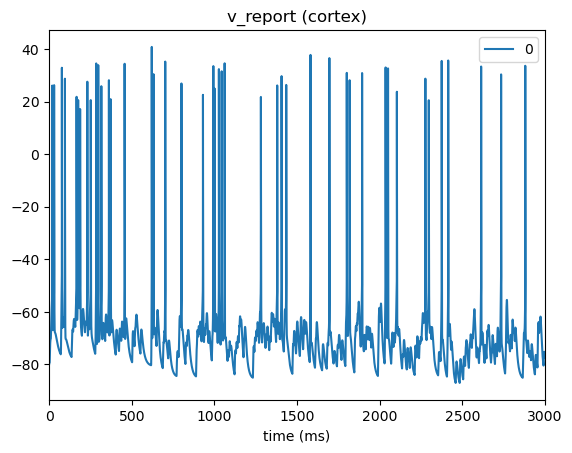

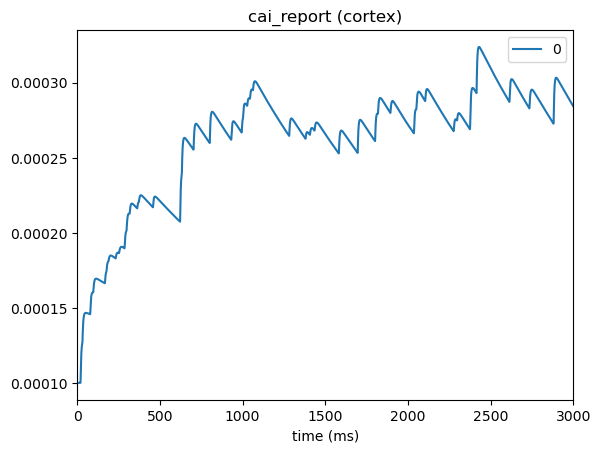

In [32]:
from bmtk.analyzer.compartment import plot_traces

_ = plot_traces(config_file='my_sim02/config.json', node_ids=[0], report_name='v_report')
_ = plot_traces(config_file='my_sim02/config.json', node_ids=[0], report_name='cai_report')
